In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

import unidecode # to remove accents from some columns
# ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# import data
train_set= pd.read_csv('./Data/train_set_drop_some_cols.csv', index_col= 'id')
test_set_original= pd.read_csv('./Data/test.csv', index_col= 'id')


In [2]:
cols_to_drop= ['Unnamed: 94', 'Unnamed: 95',
       'Unnamed: 96', 'Unnamed: 97', 'Unnamed: 98', 'Unnamed: 99','Field_68']

In [3]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False
    
    
def make_float(df, cols):
    for col in cols:
        df[col] = df[col].apply\
            (lambda x: float(x) if isfloat(x) else np.nan)


### To make life easier, fill np.nan with str 'nan'

In [4]:
train_set.fillna('nan', inplace=True)

## Fix ngaysinh (DOB)
## create a new col age = 2020 - year of birth that is extracted from dob

## As we can see below, most a re ppl from 20-40 year of age

In [5]:
train_set.ngaySinh = train_set.ngaySinh.astype(str)

train_set['age'] = train_set.ngaySinh.\
        apply(lambda x: 2020-int(x[:4]) if x != 'nan' else np.nan)

cols_to_drop.append('ngaySinh')

<AxesSubplot:xlabel='age'>

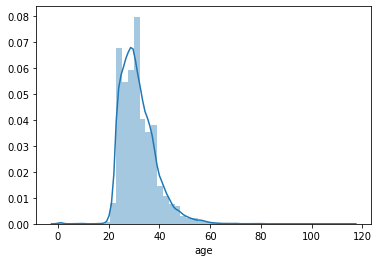

In [6]:
sns.distplot(train_set.age)

In [ ]:
train_set[(train_set.age<35)].label.value_counts()/train_set[(train_set.age<35)].label.value_counts().sum()

## Field 19: limit 0 - 5

In [374]:
make_float(train_set, ['Field_19'])
train_set.Field_19.value_counts().iloc[:50]

0.000    22541
1.000      888
1.860      136
2.340      116
2.670      116
2.060       86
2.460       80
3.000       75
2.660       68
2.410       68
2.260       66
2.100       66
3.330       39
2.860       39
1.500       29
1.670       25
2.883       24
3.660       21
3.630       20
1.581       19
3.060       18
3.240       17
1.989       16
2.010       15
2.531       14
1.680       14
1.650       13
2.720       13
2.373       12
3.663       12
2.910       12
2.608       12
2.804       12
2.040       12
4.099       11
2.490       11
2.050       11
4.136       10
3.260       10
3.363       10
1.780        9
3.990        9
3.210        9
2.610        9
5.098        9
4.589        9
1.360        9
3.333        9
3.460        8
2.190        8
Name: Field_19, dtype: int64

In [395]:
train_set.Field_19 = np.where( (train_set.Field_19 >= 5),  5 , train_set.Field_19)
train_set.Field_19 = np.where( (train_set.Field_19 < 0), 0 , train_set.Field_19)

<AxesSubplot:xlabel='Field_19'>

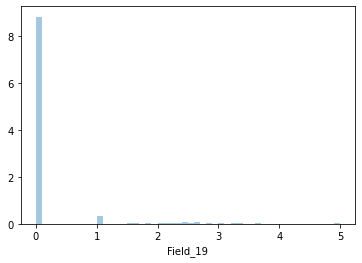

In [396]:

sns.distplot(train_set.Field_19)


<AxesSubplot:xlabel='Field_19'>

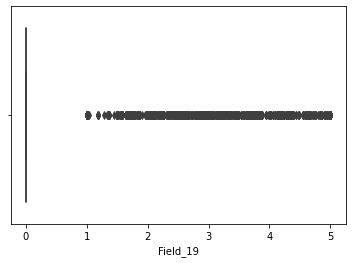

In [397]:

sns.boxplot(train_set.Field_19)


## Field_20: looks like salary: limit >= 0

In [426]:
make_float(train_set, ['Field_20'])
train_set.Field_20.value_counts().sort_values()

6427200.0       1
702000.0        1
2579460.0       1
2649900.0       1
3540000.0       1
             ... 
1043000.0     497
973000.0      557
4500000.0     715
1390000.0    1348
1490000.0    1661
Name: Field_20, Length: 4730, dtype: int64

<AxesSubplot:xlabel='Field_20'>

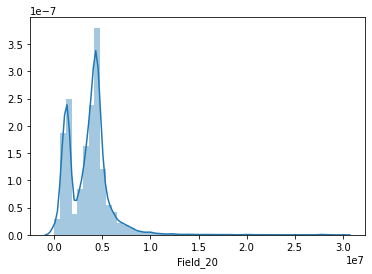

In [428]:
sns.distplot(train_set.Field_20)


In [434]:
train_set.Field_20 = np.where( (train_set.Field_20 < 0), 0 , train_set.Field_20)


## Field_21: limit 0 - 6

In [239]:
make_float(train_set, ['Field_21'])
train_set.Field_21.value_counts()

4.5           25328
0.0              94
6.0              60
3.0              43
4800000.0         5
1390000.0         5
1490000.0         3
4375000.0         2
4500000.0         2
10431500.0        2
3969700.0         1
3963400.0         1
3740000.0         1
4875424.0         1
4226500.0         1
9000000.0         1
4000000.0         1
745000.0          1
4377620.0         1
4437825.0         1
4473000.0         1
8171875.0         1
6100000.0         1
894000.0          1
4595424.0         1
910000.0          1
4168185.0         1
780000.0          1
1300000.0         1
5975000.0         1
Name: Field_21, dtype: int64

In [240]:
train_set.Field_21 = np.where( (train_set.Field_21 >= 6), 6 , train_set.Field_21)
train_set.Field_21 = np.where( (train_set.Field_21 < 0), 0 , train_set.Field_21)

In [241]:
train_set.Field_21.value_counts()

4.5    25328
6.0       99
0.0       94
3.0       43
Name: Field_21, dtype: int64

<AxesSubplot:xlabel='Field_21'>

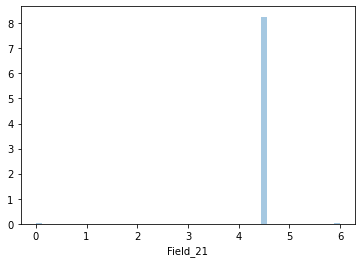

In [242]:

sns.distplot(train_set.Field_21)

<AxesSubplot:xlabel='Field_21'>

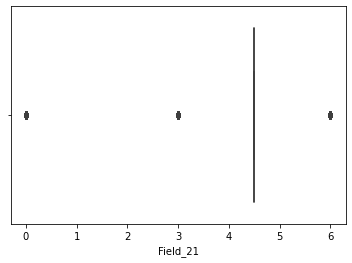

In [243]:
sns.boxplot(train_set.Field_21)


## Field_22: limit 0 - 5

In [441]:
make_float(train_set, ['Field_22'])

train_set.Field_22.value_counts()

1.0          25448
0.0             43
4.5             39
2.0             29
1043000.0        2
9224177.0        2
6887266.0        1
Name: Field_22, dtype: int64

In [443]:

train_set.Field_22 = np.where( (train_set.Field_22 >= 5),  5 , train_set.Field_22)
train_set.Field_22 = np.where( (train_set.Field_22 < 0), 0 , train_set.Field_22)

<AxesSubplot:xlabel='Field_22'>

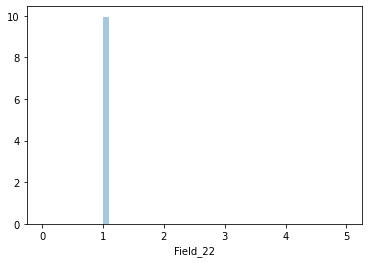

In [444]:
sns.distplot(train_set.Field_22)



<AxesSubplot:xlabel='Field_22'>

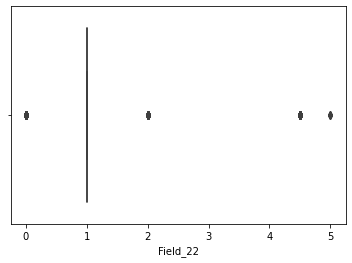

In [445]:
sns.boxplot(train_set.Field_22)

## Field _23: limit > 0

In [459]:
make_float(train_set, ['Field_23'])
train_set.Field_23.value_counts().sort_index()


0.0      6041
1.0       817
2.0       520
3.0       466
4.0       452
         ... 
386.0       1
388.0       1
399.0       1
428.0       1
464.0       1
Name: Field_23, Length: 314, dtype: int64

<AxesSubplot:xlabel='Field_23'>

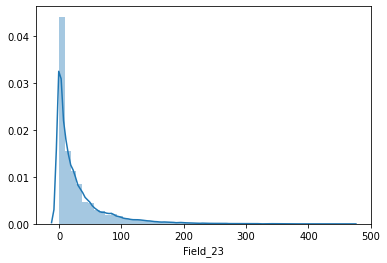

In [451]:
sns.distplot(train_set.Field_23)


<AxesSubplot:xlabel='Field_23'>

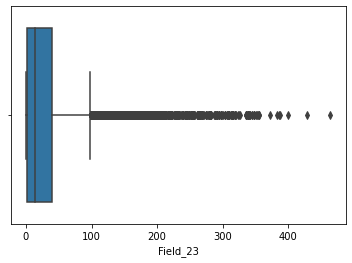

In [452]:
sns.boxplot(train_set.Field_23)


In [460]:
train_set.Field_23 = np.where( (train_set.Field_23 < 0), 0 , train_set.Field_23)


## Field_28: limit > 0 

In [463]:
make_float(train_set, ['Field_28'])
train_set.Field_28.value_counts()

0.0         23409
54450.0       144
51750.0       142
149265.0       99
168525.0       74
            ...  
478800.0        1
98280.0         1
121446.0        1
126900.0        1
163800.0        1
Name: Field_28, Length: 634, dtype: int64

<AxesSubplot:xlabel='Field_28'>

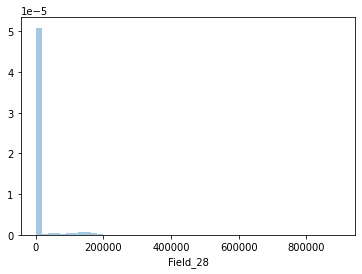

In [464]:
sns.distplot(train_set.Field_28)


<AxesSubplot:xlabel='Field_28'>

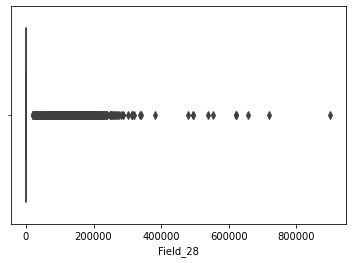

In [465]:
sns.boxplot(train_set.Field_28)


In [472]:
train_set.Field_28 = np.where( (train_set.Field_28 < 0), 0 , train_set.Field_28)


##  Field_29: limit 0- 36

In [282]:
make_float(train_set, ['Field_29'])

train_set.Field_29.value_counts().sort_index()

0.0     8994
1.0      157
2.0      269
3.0     1755
4.0      408
5.0      264
6.0     2065
7.0      243
8.0      306
9.0      335
10.0     232
11.0     184
12.0    9510
13.0     139
14.0       7
15.0      55
16.0      13
17.0       4
18.0       3
19.0       4
20.0       3
21.0       5
22.0       4
23.0       2
24.0     418
25.0       4
27.0       3
28.0       2
29.0       1
31.0       1
32.0       1
33.0       2
34.0       1
35.0       1
36.0     156
37.0       1
38.0       1
40.0       3
44.0       1
53.0       1
59.0       1
60.0       1
72.0       4
Name: Field_29, dtype: int64

In [288]:

train_set.Field_29 = np.where( (train_set.Field_29 >= 36),  36 , train_set.Field_29)
train_set.Field_29 = np.where( (train_set.Field_29 < 0), 0 , train_set.Field_29)


<AxesSubplot:xlabel='Field_29'>

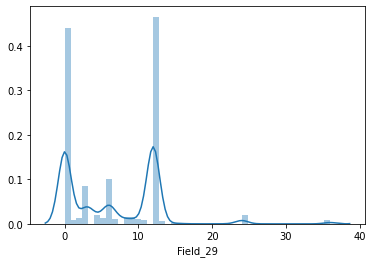

In [290]:

sns.distplot(train_set.Field_29)



<AxesSubplot:xlabel='Field_29'>

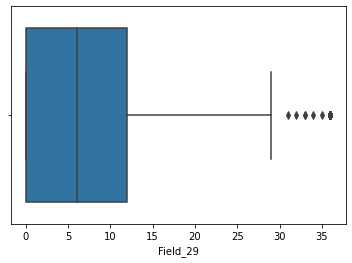

In [291]:
sns.boxplot(train_set.Field_29)

## Field_36: if the length is > 2 then nan

In [326]:
train_set.Field_36.value_counts()

nan                                                                                                    27466
DN                                                                                                     15192
GD                                                                                                      4846
HC                                                                                                      1362
TN                                                                                                      1327
                                                                                                       ...  
 Phường Lam Sơn                                                                                            1
Tổ 15, Phường Vĩnh Hòa, Thành phố Nha Trang, Tỉnh Khánh Hòa                                                1
32 Nguyễn Bỉnh Khiêm, Phường Xương Huân, Thành phố Nha Trang, Tỉnh Khánh Hòa                               1
Thôn Nam Hồng, Xã H

In [334]:
train_set.Field_36 = train_set.Field_36.apply(lambda x: x if len(x) <= 2 else np.nan)

## Field_39: has some float and int so convert them all into float

In [7]:
train_set.Field_39 = np.where((train_set.Field_39 == 'DN') | (train_set.Field_39 == 'GD'), \
                              'nan', train_set.Field_39)

In [8]:
train_set.Field_39 = train_set.Field_39.astype(float)

<AxesSubplot:xlabel='Field_39'>

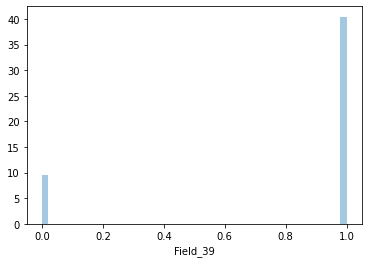

In [9]:
sns.distplot(train_set.Field_39)

## Field_42

<AxesSubplot:xlabel='Field_42'>

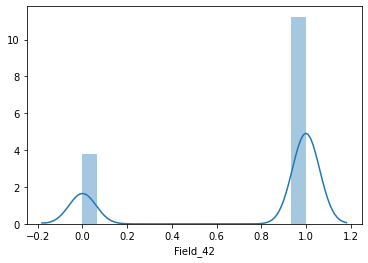

In [10]:
make_float(train_set, ['Field_42'])

sns.distplot(train_set.Field_42)

## Field_47

In [11]:
map_dict_field_47 = {'Zezo': 0, 'One': 1, 'Two': 2, \
                     'Three': 3, 'Four':4}

In [12]:
train_set.Field_47 = train_set.Field_47.map(map_dict_field_47)

<AxesSubplot:xlabel='Field_47'>

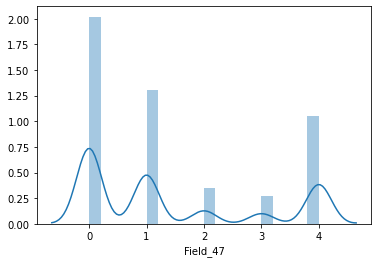

In [13]:
sns.distplot(train_set.Field_47)

## Field_50 and 51 , only have a few (4 and 6) records of 0, make it nan also

In [14]:
map_dict_field_51 = {'1': 1}
train_set.Field_51 = train_set.Field_51.map(map_dict_field_51)

## Field_53

<AxesSubplot:xlabel='Field_53'>

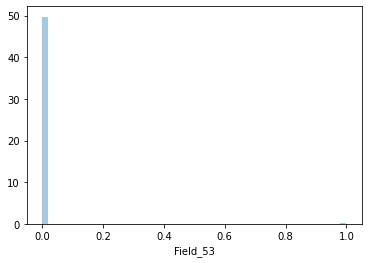

In [15]:
make_float(train_set, ['Field_53'])

sns.distplot(train_set.Field_53)

<AxesSubplot:xlabel='Field_53'>

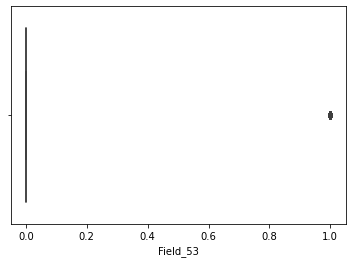

In [16]:
sns.boxplot(train_set.Field_53)

## Field_58

<AxesSubplot:xlabel='Field_58'>

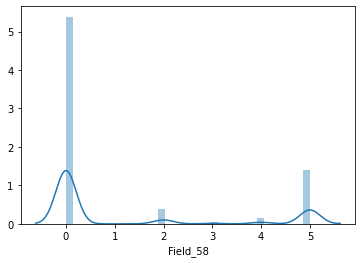

In [17]:
make_float(train_set, ['Field_58'])

sns.distplot(train_set.Field_58)

## Field_60: limit 0- 90

<AxesSubplot:xlabel='Field_60'>

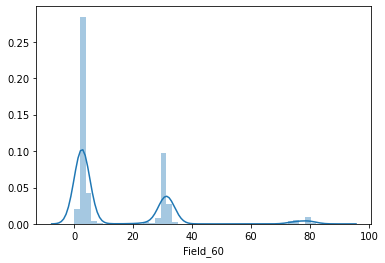

In [18]:
make_float(train_set, ['Field_60'])

sns.distplot(train_set.Field_60)

In [267]:
train_set.Field_60 = np.where( (train_set.Field_60 >= 90),  90 , train_set.Field_60)
train_set.Field_60 = np.where( (train_set.Field_60 < 0), 0 , train_set.Field_60)


<AxesSubplot:xlabel='Field_60'>

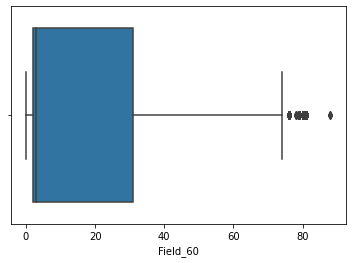

In [269]:

sns.boxplot(train_set.Field_60)

## Field_61, 62 

## most likely drop 61
Field_61: Field_62
Khối DN có vốn DTNN:

In [19]:
# remove all Vietnamese accents in the words
train_set.Field_61 = train_set.Field_61.apply(lambda x: unidecode.unidecode(x).lower() \
                     if type(x) == str else np.nan)


train_set.Field_62 = train_set.Field_62.apply(lambda x: unidecode.unidecode(x).lower() \
                     if type(x) == str else np.nan)

In [20]:
#cross tab of Field_61 and 62
field6162_ct = pd.crosstab(train_set.Field_61,train_set.Field_62)


In [21]:
field6162_dict ={}
for idx in field6162_ct.index:
    
#     print (idx, ':', \
#            field6162_ct.loc[idx][(field6162_ct.loc[idx] > 0)].index)
    field6162_dict[idx] = field6162_ct.loc[idx][(field6162_ct.loc[idx] > 0)].index[0]
#     field6162_dict[idx] =

## Field_62 can be refined using values from crosstab between Field_61 and Field_62
## Keep the dict for later

In [22]:
field62_map = {'i': 'i', 'v': 'v', 'ii': 'ii', 'iv': 'iv', 'iii': 'iii',\
              'khoi dn co von dtnn': 'i', 'ho gia dinh': 'v',\
              'khoi dn ngoai quoc doanh': 'i', 'khoi hs, dang, doan': 'i',\
              '3': 'iii', '2': 'ii'}

In [23]:
train_set.Field_62 = train_set.Field_62.map(field62_map)

In [24]:
cols_to_drop.append('Field_61')

## Field_63: limit 0 -10

<AxesSubplot:xlabel='Field_63'>

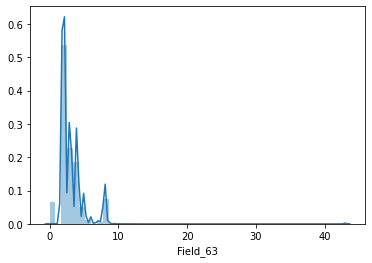

In [25]:
make_float(train_set, ['Field_63'])

sns.distplot(train_set.Field_63)

In [26]:
train_set.Field_63.value_counts()


2.0     11780
3.0      5026
4.0      4074
8.0      1657
0.0      1419
5.0      1137
6.0       228
7.0       127
43.0       30
9.0        29
Name: Field_63, dtype: int64

In [27]:
train_set.Field_63 = np.where( (train_set.Field_63 >= 10), 10 , train_set.Field_63)
train_set.Field_63 = np.where( (train_set.Field_63 < 0), 0 , train_set.Field_63)

<AxesSubplot:xlabel='Field_63'>

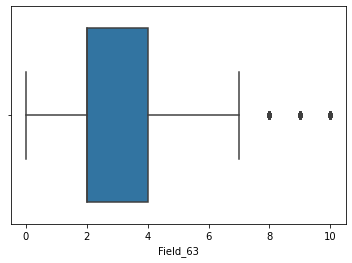

In [28]:
sns.boxplot(train_set.Field_63)

## Field_64:  limit 0 - 5

<AxesSubplot:xlabel='Field_64'>

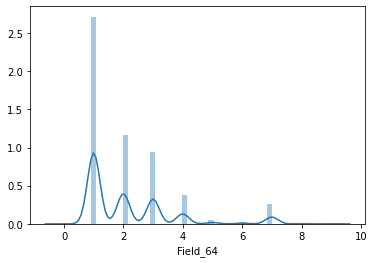

In [29]:
make_float(train_set, ['Field_64'])

sns.distplot(train_set.Field_64)

In [30]:
train_set.Field_64.value_counts()


1.0    11780
2.0     5041
3.0     4098
4.0     1660
7.0     1137
5.0      228
6.0      127
8.0       31
9.0       30
0.0        3
Name: Field_64, dtype: int64

In [31]:
train_set.Field_64 = np.where( (train_set.Field_64 >= 5), 5 , train_set.Field_64)
train_set.Field_64 = np.where( (train_set.Field_64 < 1), 1 , train_set.Field_64)

<AxesSubplot:xlabel='Field_64'>

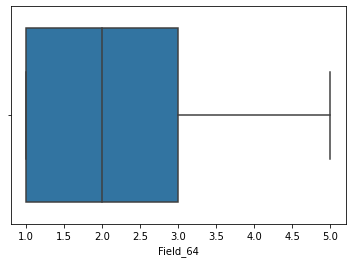

In [32]:
sns.boxplot(train_set.Field_64)

## Field_65, 66 : maybe just leave them as is

In [33]:
train_set.Field_65.value_counts()

nan                                                         28884
Vùng 1                                                      11780
Vùng 2                                                       5026
Vùng 3                                                       4071
Vùng 4                                                       1657
DN đầu tư NN (Vùng 1 có ĐT) {01->09, 15}                     1137
DN đầu tư NN (Vùng 2 có ĐT) {10->14, 16, 19->23, 25, 29}      228
DN đầu tư NN (Vùng 3 có ĐT) {17, 18, 24, 26->28}              127
2                                                              33
DN tư nhân                                                     30
DN đầu tư NN (Vùng 4 có ĐT)                                    29
1                                                              12
5                                                               6
3                                                               4
Khối DN có vốn DTNN                                             3
4         

In [34]:
train_set.Field_66.value_counts()

nan       28240
D          5297
C          4519
G          3721
E          3606
F          2505
B          2327
I          1531
H          1228
Vùng 2       27
Vùng 1       12
1             6
Vùng 3        3
3             3
Vùng 4        2
7             2
2             1
Name: Field_66, dtype: int64

## Field_67

<AxesSubplot:xlabel='Field_67'>

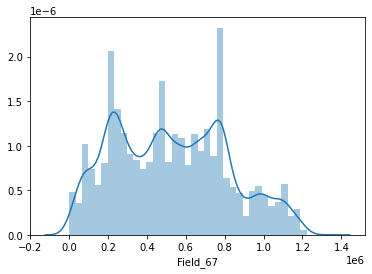

In [35]:
make_float(train_set, ['Field_67'])
sns.distplot(train_set.Field_67)

<AxesSubplot:xlabel='Field_67'>

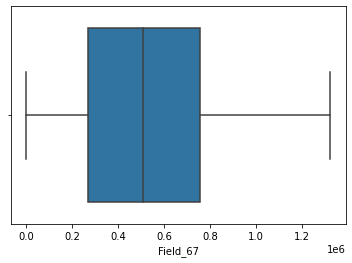

In [36]:
sns.boxplot(train_set.Field_67)

## Field_68: tax code: drop

## Field_69
## Whatever > 1 is likely errors

In [37]:
make_float(train_set, ['Field_69'])
train_set.Field_69 = np.where(train_set.Field_69 <= 1, \
                              train_set.Field_69 , np.nan)

<AxesSubplot:xlabel='Field_69'>

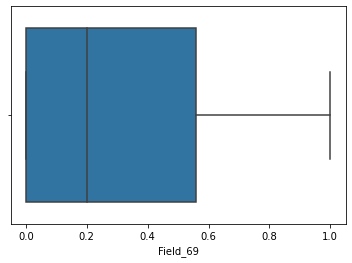

In [38]:
sns.boxplot(train_set.Field_69 )

<AxesSubplot:xlabel='Field_69'>

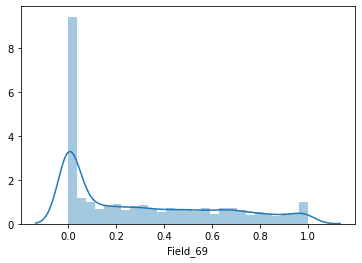

In [39]:
make_float(train_set, ['Field_69'])

sns.distplot(train_set.Field_69)


## Field_70
## there are a few string mixed in, so make them nans
## also there are outliers
## limit 0 - 1

In [40]:
train_set.Field_70.value_counts()[100:]

0.53                                  3
1                                     3
0.1                                   2
0.7                                   2
784722                                2
Vùng 2                                2
0.72                                  2
0.36                                  1
0.59                                  1
0.22                                  1
amp                                   1
Cônh nhân tổ thống kê                 1
nhân viên kinh doanh dự án samsung    1
0.78                                  1
0.37                                  1
0.75                                  1
0.5                                   1
E                                     1
0.36                                  1
Vùng 1                                1
0.37                                  1
0.07                                  1
0.22                                  1
D                                     1
0.5                                   1


<AxesSubplot:xlabel='Field_70'>

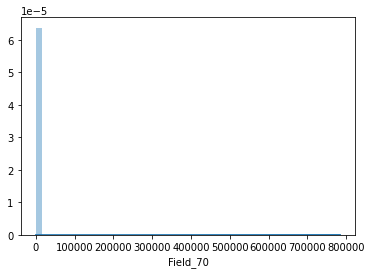

In [41]:
make_float(train_set, ['Field_70'])

sns.distplot(train_set.Field_70)

In [42]:

train_set.Field_70 = np.where( (train_set.Field_70 >= 1), 1 , train_set.Field_70)
train_set.Field_70 = np.where( (train_set.Field_70 < 0), 0 , train_set.Field_70)

<AxesSubplot:xlabel='Field_70'>

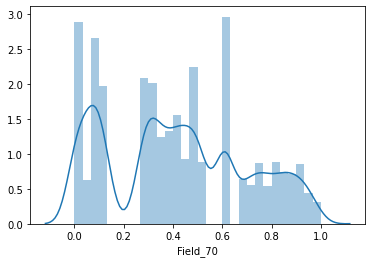

In [43]:
sns.distplot(train_set.Field_70)

<AxesSubplot:xlabel='Field_70'>

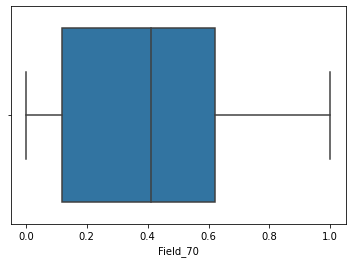

In [44]:
sns.boxplot(train_set.Field_70)

## Field_71: limit max == 1
## some string mixed in, make those nan
## also likely errors or maybe outliers, make them nan too

In [45]:
train_set.Field_71.value_counts(dropna=False).sort_values(ascending=False)

nan       27466
0.06        732
0.245       603
0.04        545
0.175       349
          ...  
-0.01         1
1             1
-0.155        1
1.0           1
-0.055        1
Name: Field_71, Length: 491, dtype: int64

<AxesSubplot:xlabel='Field_71'>

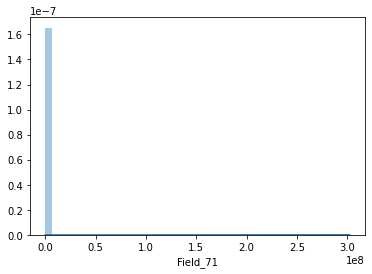

In [46]:
make_float(train_set, ['Field_71'])

sns.distplot(train_set.Field_71)

In [47]:
train_set.Field_71 = np.where( (train_set.Field_71 >= 1), 1 , train_set.Field_71)


<AxesSubplot:xlabel='Field_71'>

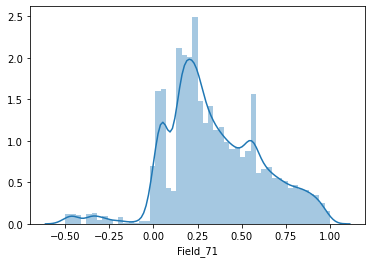

In [48]:
sns.distplot(train_set.Field_71)

<AxesSubplot:xlabel='Field_71'>

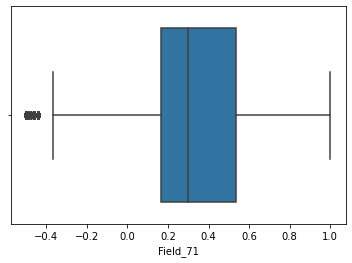

In [49]:
sns.boxplot(train_set.Field_71)

## Field_72: limit max == 2

<AxesSubplot:xlabel='Field_72'>

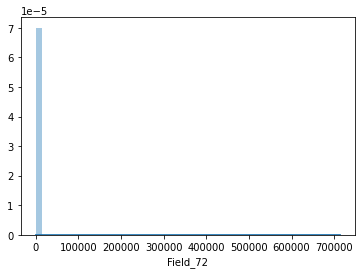

In [50]:
make_float(train_set, ['Field_72'])

sns.distplot(train_set.Field_72)

<AxesSubplot:xlabel='Field_72'>

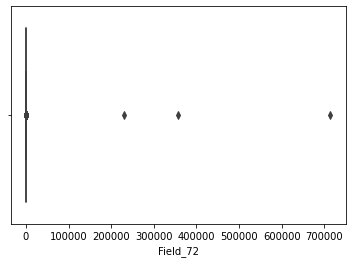

In [51]:
sns.boxplot(train_set.Field_72)


In [52]:
train_set.Field_72 = np.where( (train_set.Field_72 >= 2), 2 , train_set.Field_72)

<AxesSubplot:xlabel='Field_72'>

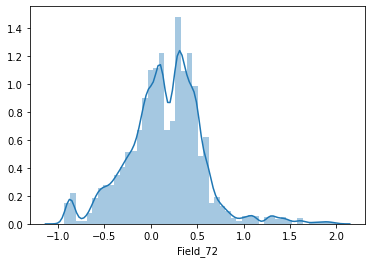

In [53]:
sns.distplot(train_set.Field_72)

<AxesSubplot:xlabel='Field_72'>

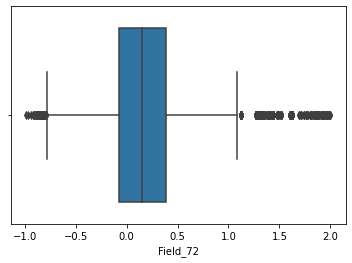

In [54]:
sns.boxplot(train_set.Field_72)

## Field_73:
## some strings mixed i and errors (values too big) make em nan
## either 0 or 1, less than 0.5 then 0, greater than 0.5 then 1

In [55]:
make_float(train_set, ['Field_73'])
train_set.Field_73.value_counts()

 1.000000e+00    28697
 0.000000e+00      377
 3.700000e-01        4
 2.100000e-01        3
-7.000000e-02        2
-4.000000e-02        2
 6.300000e-01        2
-1.800000e-01        2
 3.800000e-01        2
-6.400000e-01        2
 9.450000e-01        2
 4.300000e-01        2
 3.500000e-01        2
-8.800000e-01        2
-3.000000e-02        1
-3.800000e-01        1
 5.200000e-01        1
-1.700000e-01        1
 8.100000e-01        1
-1.300000e-01        1
 9.600000e-01        1
 9.000000e-02        1
 2.150000e-01        1
 1.300000e-01        1
-1.900000e-01        1
 3.095448e+08        1
 2.200000e-01        1
 2.700000e-01        1
-4.200000e-01        1
 4.400000e-01        1
 6.450000e-01        1
 6.000000e-01        1
-5.800000e-01        1
-1.000000e-02        1
 3.400388e+09        1
-2.900000e-01        1
 1.700000e-01        1
 4.000000e-02        1
-8.700000e-01        1
 1.600638e+09        1
 3.900000e-01        1
-2.100000e-01        1
 8.000000e-02        1
 4.900000e-

In [56]:

train_set.Field_73 = np.where( (train_set.Field_73 >= 0.5), 1 , train_set.Field_73)
train_set.Field_73 = np.where( (train_set.Field_73 < 1), 0.5 , train_set.Field_73)


<AxesSubplot:xlabel='Field_73'>

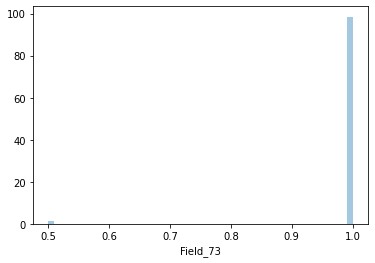

In [57]:
make_float(train_set, ['Field_73'])

sns.distplot(train_set.Field_73)

<AxesSubplot:xlabel='Field_73'>

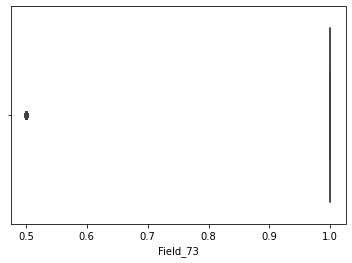

In [58]:
sns.boxplot(train_set.Field_73)

## Field_74: lim: max == 6000

<AxesSubplot:xlabel='Field_74'>

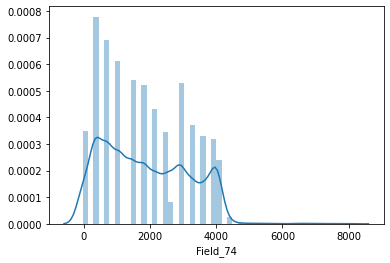

In [59]:
make_float(train_set, ['Field_74'])

sns.distplot(train_set.Field_74)

In [60]:
train_set.Field_74 = np.where( (train_set.Field_74 >= 6000), 6000 , train_set.Field_74)


<AxesSubplot:xlabel='Field_74'>

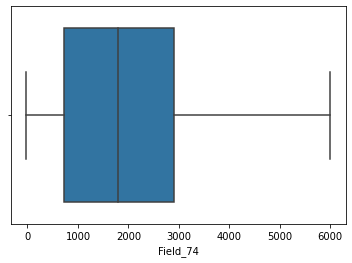

In [61]:
sns.boxplot(train_set.Field_74)

## Field_75: limit 1-14

## look like some outliers ( > 14 and < 1)
## with discrete values, this looks like categorical

<AxesSubplot:xlabel='Field_75'>

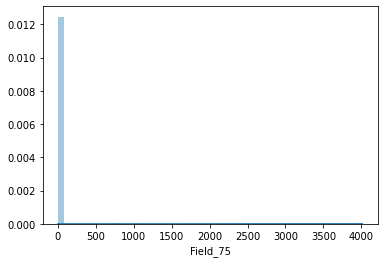

In [62]:
make_float(train_set, ['Field_75'])

sns.distplot(train_set.Field_75)

In [63]:


train_set.Field_75 = np.where( (train_set.Field_75 >= 14), 14 , train_set.Field_75)
train_set.Field_75 = np.where( (train_set.Field_75 < 1), 1 , train_set.Field_75)


<AxesSubplot:xlabel='Field_75'>

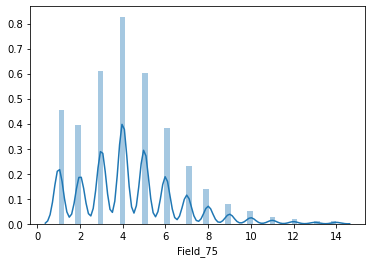

In [64]:
sns.distplot(train_set.Field_75)

<AxesSubplot:xlabel='Field_75'>

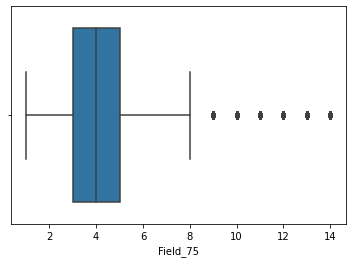

In [65]:
sns.boxplot(train_set.Field_75)

## Field_76: something like Field_75: limit 0 -5

In [66]:
train_set.Field_76.value_counts(dropna=False)

nan       29504
0.0       11245
1.0        6533
2.0        3877
3.0        1284
4.0         398
5.0         116
6.0          30
7.0          13
8.0           8
9.0           5
10.0          2
0.41          2
0.27          2
3278.0        2
3286.0        2
14.0          1
1090.0        1
2535.0        1
0.74          1
4010.0        1
0.62          1
11.0          1
Name: Field_76, dtype: int64

<AxesSubplot:xlabel='Field_76'>

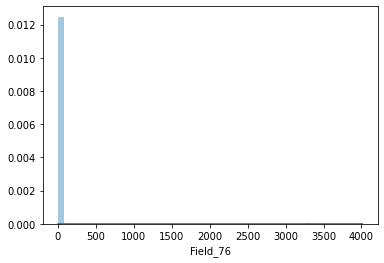

In [67]:
make_float(train_set, ['Field_76'])

sns.distplot(train_set.Field_76)

In [68]:

train_set.Field_76 = np.where( (train_set.Field_76 >= 5), 5 , train_set.Field_76)
train_set.Field_76 = np.where( (train_set.Field_76 < 0), 0 , train_set.Field_76)


<AxesSubplot:xlabel='Field_76'>

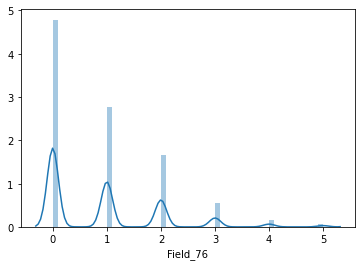

In [69]:
sns.distplot(train_set.Field_76)

<AxesSubplot:xlabel='Field_76'>

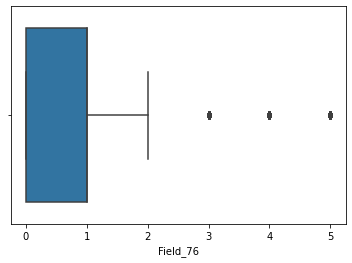

In [70]:
sns.boxplot(train_set.Field_76)

## Field_77: like Field_75 76, limit 0-10

In [71]:
train_set.Field_77.value_counts(dropna=False)

nan       29504
4.0        4463
1.0        4220
3.0        4177
2.0        3372
5.0        2914
6.0        1710
7.0         915
0.0         612
8.0         531
9.0         257
10.0        175
11.0         82
12.0         52
13.0         25
14.0         17
0.205         2
0.405         1
2536.0        1
Name: Field_77, dtype: int64

<AxesSubplot:xlabel='Field_77'>

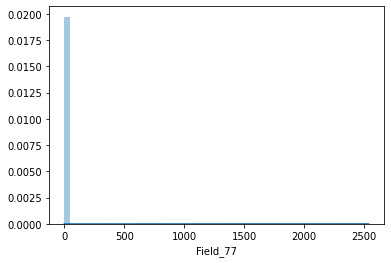

In [72]:
make_float(train_set, ['Field_77'])

sns.distplot(train_set.Field_77)

In [223]:


train_set.Field_77 = np.where( (train_set.Field_77 >= 10), 10 , train_set.Field_77)
train_set.Field_77 = np.where( (train_set.Field_77 < 1), 0 , train_set.Field_77)


<AxesSubplot:xlabel='Field_77'>

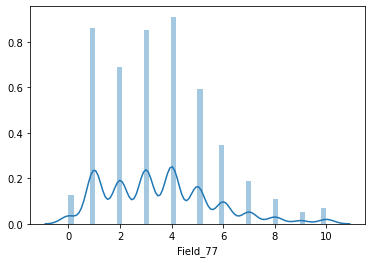

In [75]:
sns.distplot(train_set.Field_77)

<AxesSubplot:xlabel='Field_77'>

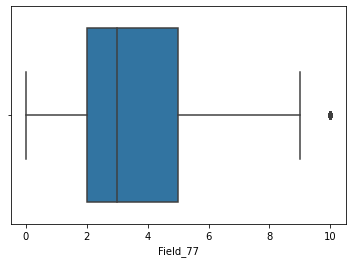

In [76]:
sns.boxplot(train_set.Field_77)

## Field_78

<AxesSubplot:xlabel='Field_78'>

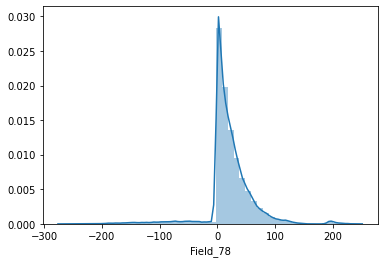

In [77]:
make_float(train_set, ['Field_78'])

sns.distplot(train_set.Field_78)

<AxesSubplot:xlabel='Field_78'>

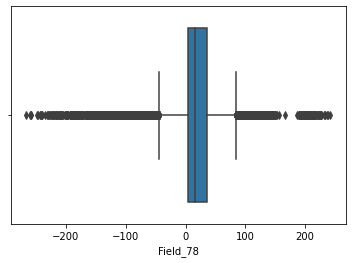

In [78]:
sns.boxplot(train_set.Field_78)

## Field_79: only 1 has val < 0 -> make it nan

<AxesSubplot:xlabel='Field_79'>

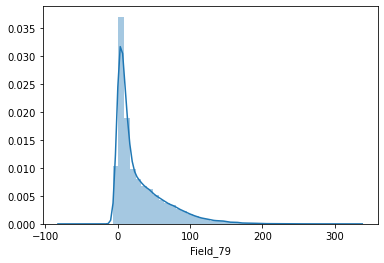

In [79]:
make_float(train_set, ['Field_79'])

sns.distplot(train_set.Field_79)

In [80]:
train_set.Field_79 = np.where( (train_set.Field_79 >= 0),\
                              train_set.Field_79, np.nan)

<AxesSubplot:xlabel='Field_79'>

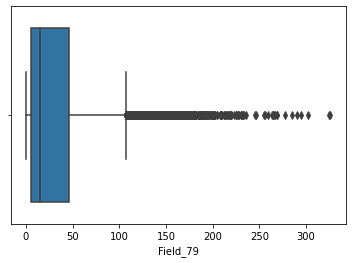

In [81]:
sns.boxplot(train_set.Field_79)

## Field_80

<AxesSubplot:xlabel='Field_80'>

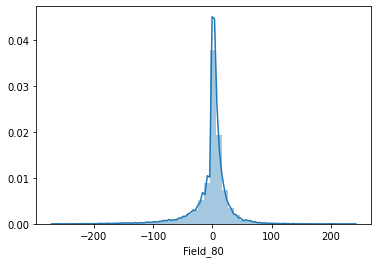

In [82]:
make_float(train_set, ['Field_80'])

sns.distplot(train_set.Field_80)

<AxesSubplot:xlabel='Field_80'>

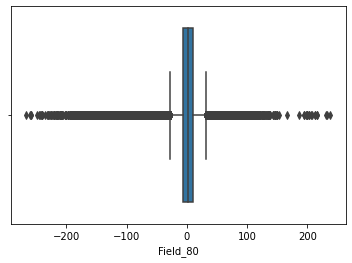

In [83]:
sns.boxplot(train_set.Field_80)

## Field_81

<AxesSubplot:xlabel='Field_81'>

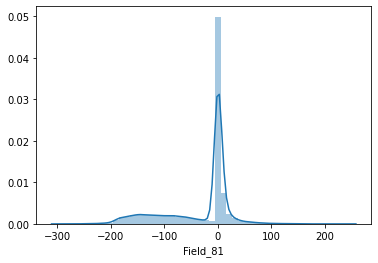

In [84]:
make_float(train_set, ['Field_81'])

sns.distplot(train_set.Field_81)

<AxesSubplot:xlabel='Field_81'>

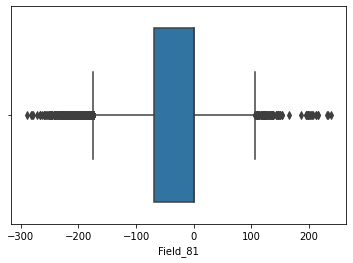

In [85]:
sns.boxplot(train_set.Field_81)

## Field_82: looks like values apart from 1 2 3 4 are errors

<AxesSubplot:xlabel='Field_82'>

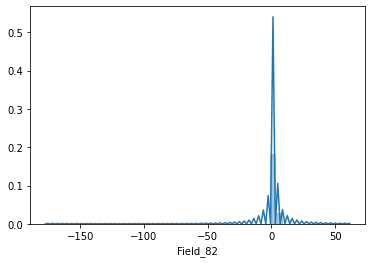

In [86]:
make_float(train_set, ['Field_82'])

sns.distplot(train_set.Field_82)

In [89]:
train_set.Field_82.value_counts().sort_index()

0.0        9
1.0    36200
2.0     5089
3.0     4685
4.0     6993
Name: Field_82, dtype: int64

In [95]:
data.Field_82.value_counts().sort_index()

-177.000000        1
-137.000000        1
-136.000000        1
-132.000000        1
-119.000000        1
-99.000000         2
-81.000000         1
-78.000000         1
-70.000000         1
-64.000000         1
-56.000000         1
-46.500000         1
-20.000000         1
-7.000000          1
 0.000000          9
 1.000000      36200
 2.000000       5089
 3.000000       4685
 4.000000       6993
 6.000000          1
 7.000000          1
 9.666667          2
 10.000000         1
 12.000000         1
 15.000000         1
 15.500000         1
 22.000000         1
 61.000000         1
Name: Field_82, dtype: int64

In [101]:
pd.Series(np.where(data.Field_82 >= 4, 4 , data.Field_82)).value_counts()

 1.0      36200
 4.0       7003
 2.0       5089
 3.0       4685
 0.0          9
-99.0         2
-56.0         1
-137.0        1
-136.0        1
-119.0        1
-20.0         1
-132.0        1
-81.0         1
-177.0        1
-64.0         1
-46.5         1
-70.0         1
-7.0          1
-78.0         1
dtype: int64

In [102]:

train_set.Field_82 = np.where(train_set.Field_82 >= 4, 4 , train_set.Field_82)
train_set.Field_82 = np.where( (train_set.Field_82 < 1), 1 , train_set.Field_82)

<AxesSubplot:xlabel='Field_82'>

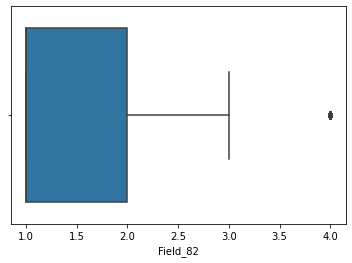

In [106]:
sns.boxplot(train_set.Field_82)

<AxesSubplot:xlabel='Field_82'>

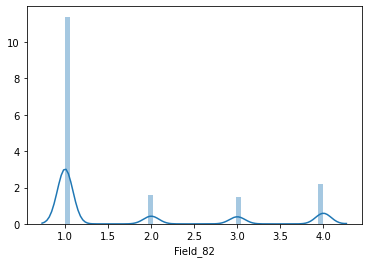

In [107]:
sns.distplot(train_set.Field_82)

## create a new column name partner_sum

In [108]:
partners_cols = ['partner0_A', 'partner0_B', 'partner0_C',
       'partner0_D', 'partner0_E', 'partner0_F', 'partner0_G', 'partner0_H',
       'partner1_A', 'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A',
       'partner2_C', 'partner2_D', 'partner2_F', 'partner2_H', 'partner3_A',
       'partner3_D', 'partner3_E', 'partner4_L', 'partner5_A', 'partner5_D',
       'partner5_G']

In [109]:
train_set['partner_sum'] = train_set[partners_cols].\
        applymap(lambda x: np.nan if x=='nan' else x).sum(axis=1)

In [110]:
train_set[partners_cols] = train_set[partners_cols].\
            applymap(lambda x: np.nan if x=='nan' else x)

In [111]:
partners_cols.append('partner_sum')

<!-- ## From the below correlations, we can drop:
['partner0_C', 'partner0_D', 'partner0_E', 'partner0_F',\
                     'partner2_C', 'partner2_D', 'partner2_F', 'partner2_F',\
                     'partner2_H'] -->

In [112]:
# partners_cols_corr = train_set[partners_cols].corr()
# for col in partners_cols:
#     print ("For", col)
#     print (partners_cols_corr[col][partners_cols_corr[col]>0.9])

## friendCount

<AxesSubplot:xlabel='friendCount'>

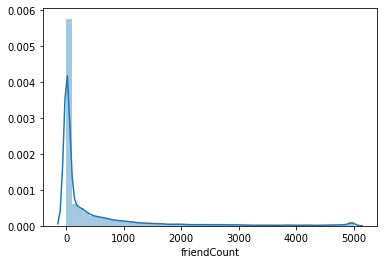

In [113]:
make_float(train_set, ['friendCount'])

sns.distplot(train_set.friendCount)

<AxesSubplot:xlabel='friendCount'>

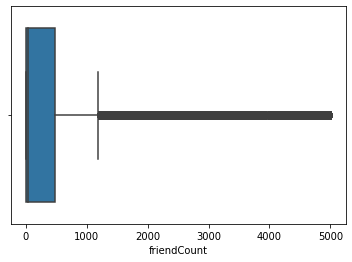

In [124]:
sns.boxplot(train_set.friendCount)

## subscriberCount


<AxesSubplot:xlabel='subscriberCount'>

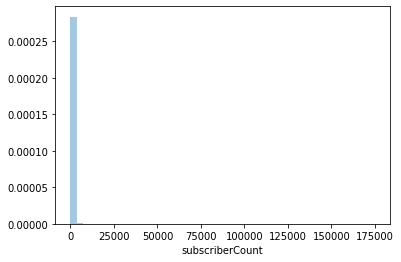

In [125]:
make_float(train_set, ['subscriberCount'])

sns.distplot(train_set.subscriberCount)

<AxesSubplot:xlabel='subscriberCount'>

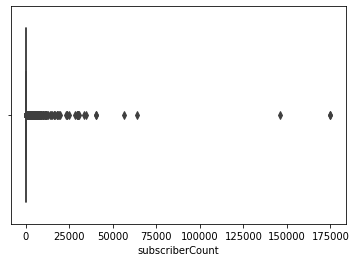

In [126]:
sns.boxplot(train_set.subscriberCount)

## topFriends: looks like there should be online from 0 - 5. Anything more than 5, we'll make it 5

<AxesSubplot:xlabel='topFriends'>

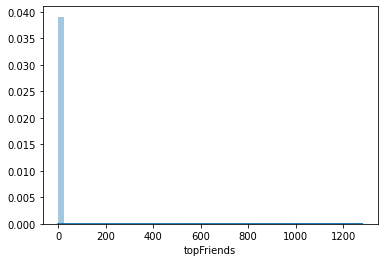

In [132]:
make_float(train_set, ['topFriends'])

sns.distplot(train_set.topFriends)

In [133]:
train_set.topFriends = np.where( (train_set.topFriends >= 5), 5 , train_set.topFriends)
train_set.topFriends = np.where( (train_set.topFriends < 0), 0 , train_set.topFriends)

<AxesSubplot:xlabel='topFriends'>

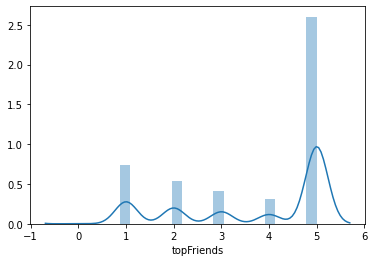

In [134]:
sns.distplot(train_set.topFriends)

## numOrg: make it limit from 0-15

<AxesSubplot:xlabel='numOrg'>

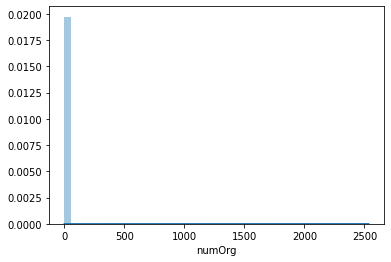

In [135]:
make_float(train_set, ['numOrg'])

sns.distplot(train_set.numOrg)

In [136]:
train_set.numOrg = np.where( (train_set.numOrg >= 15), 15 , train_set.numOrg)
train_set.numOrg = np.where( (train_set.numOrg < 0), 0 , train_set.numOrg)

<AxesSubplot:xlabel='numOrg'>

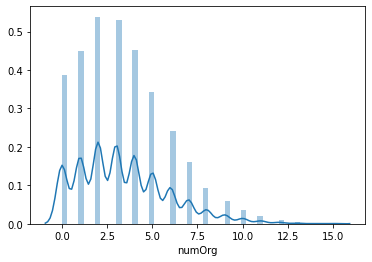

In [137]:
sns.distplot(train_set.numOrg)

<AxesSubplot:xlabel='numOrg'>

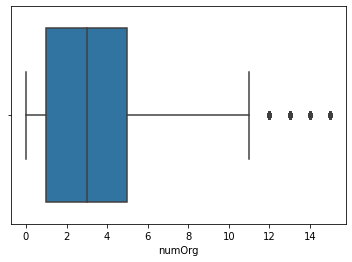

In [141]:
sns.boxplot(train_set.numOrg)

## F_numOrg: make limit (0-5)

<AxesSubplot:xlabel='F_numOrg'>

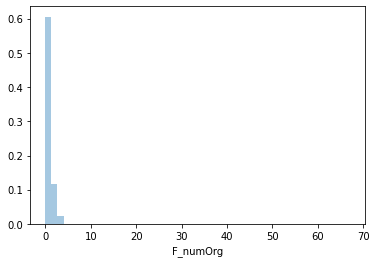

In [143]:
make_float(train_set, ['F_numOrg'])

sns.distplot(train_set.F_numOrg)

<AxesSubplot:xlabel='F_numOrg'>

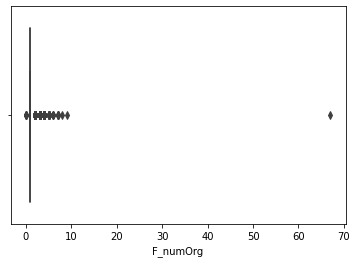

In [144]:
sns.boxplot(train_set.F_numOrg)

In [145]:
train_set.F_numOrg = np.where( (train_set.F_numOrg >= 5), 5 , train_set.F_numOrg)
train_set.F_numOrg = np.where( (train_set.F_numOrg < 1), 1 , train_set.F_numOrg)

<AxesSubplot:xlabel='F_numOrg'>

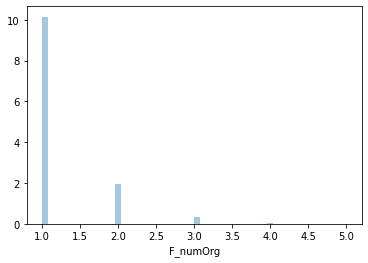

In [146]:
sns.distplot(train_set.F_numOrg)

<AxesSubplot:xlabel='F_numOrg'>

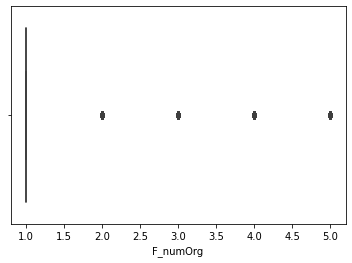

In [147]:
sns.boxplot(train_set.F_numOrg)

## F_numQuery: make limit 1-5

In [149]:
make_float(train_set, ['F_numQuery'])

train_set.F_numQuery.value_counts()

1.0       17533
2.0        5102
3.0        1645
4.0         521
5.0         183
6.0          84
7.0          22
8.0          10
9.0           7
0.0           6
12.0          2
10.0          2
16.0          2
5627.0        1
15.0          1
11.0          1
13.0          1
57.0          1
Name: F_numQuery, dtype: int64

In [150]:
train_set.F_numQuery = np.where( (train_set.F_numQuery >= 5), 5 , train_set.F_numQuery)
train_set.F_numQuery = np.where( (train_set.F_numQuery < 1), 1 , train_set.F_numQuery)

<AxesSubplot:xlabel='F_numQuery'>

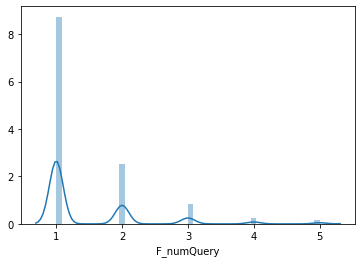

In [151]:
sns.distplot(train_set.F_numQuery)

<AxesSubplot:xlabel='F_numQuery'>

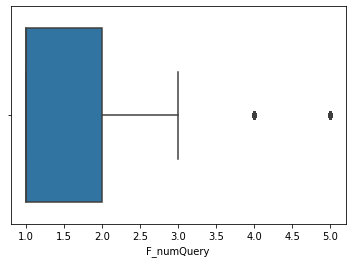

In [152]:
sns.boxplot(train_set.F_numQuery)

## E_numOrg: limit 1-5

In [153]:
make_float(train_set, ['E_numOrg'])
train_set.E_numOrg.value_counts()


1.0    19400
2.0     4975
3.0     1108
4.0      195
5.0       26
6.0        2
7.0        1
Name: E_numOrg, dtype: int64

In [154]:

train_set.E_numOrg = np.where( (train_set.E_numOrg >= 5), 5 , train_set.E_numOrg)
train_set.E_numOrg = np.where( (train_set.E_numOrg < 1), 1 , train_set.E_numOrg)


<AxesSubplot:xlabel='E_numOrg'>

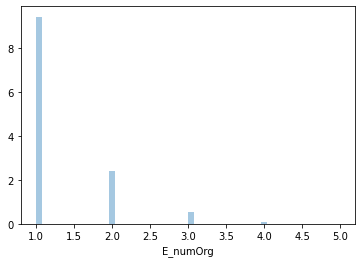

In [155]:
sns.distplot(train_set.E_numOrg)


<AxesSubplot:xlabel='E_numOrg'>

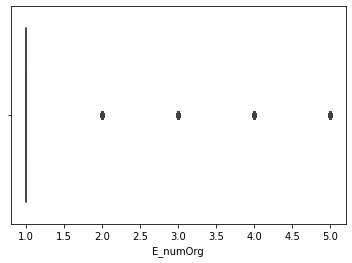

In [156]:
sns.boxplot(train_set.E_numOrg)

## E_numQuery: 1-5

In [157]:
make_float(train_set, ['E_numQuery'])
train_set.E_numQuery.value_counts()


1.0     16363
2.0      5682
3.0      2202
4.0       885
5.0       355
6.0       129
7.0        48
8.0        18
9.0        12
10.0       10
12.0        1
46.0        1
11.0        1
14.0        1
0.0         1
16.0        1
Name: E_numQuery, dtype: int64

<AxesSubplot:xlabel='E_numQuery'>

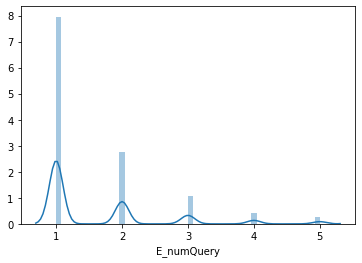

In [158]:
train_set.E_numQuery.value_counts()
make_float(train_set, ['E_numQuery'])



train_set.E_numQuery = np.where( (train_set.E_numQuery >= 5), 5 , train_set.E_numQuery)
train_set.E_numQuery = np.where( (train_set.E_numQuery < 1), 1 , train_set.E_numQuery)


sns.distplot(train_set.E_numQuery)


<AxesSubplot:xlabel='E_numQuery'>

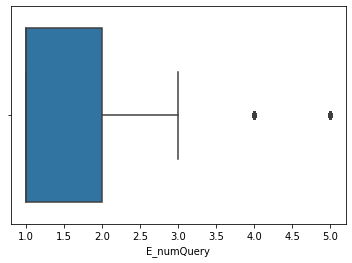

In [159]:

sns.boxplot(train_set.E_numQuery)

## C_numOrg: limit 1-5

In [160]:
make_float(train_set, ['C_numOrg'])
train_set.C_numOrg.value_counts()



1.0    20413
2.0     1402
3.0       89
4.0        1
Name: C_numOrg, dtype: int64

<AxesSubplot:xlabel='C_numOrg'>

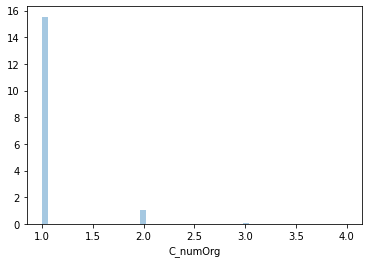

In [161]:

train_set.C_numOrg = np.where( (train_set.C_numOrg >= 5), 5 , train_set.C_numOrg)
train_set.C_numOrg = np.where( (train_set.C_numOrg < 1), 1 , train_set.C_numOrg)


sns.distplot(train_set.C_numOrg)


<AxesSubplot:xlabel='C_numOrg'>

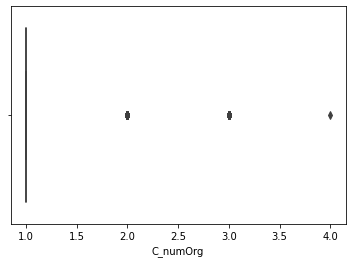

In [162]:

sns.boxplot(train_set.C_numOrg)

## C_numQuery

In [163]:
train_set.C_numQuery.value_counts()
make_float(train_set, ['C_numQuery'])


<AxesSubplot:xlabel='C_numQuery'>

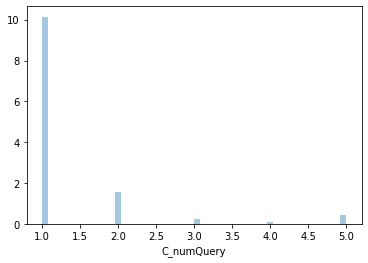

In [164]:



train_set.C_numQuery = np.where( (train_set.C_numQuery >= 5), 5 , train_set.C_numQuery)
train_set.C_numQuery = np.where( (train_set.C_numQuery < 1), 1 , train_set.C_numQuery)


sns.distplot(train_set.C_numQuery)


<AxesSubplot:xlabel='C_numQuery'>

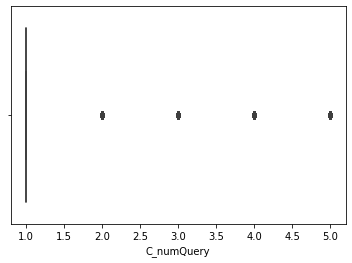

In [165]:

sns.boxplot(train_set.C_numQuery)

## G_numOrg: limit 1-5

In [166]:
make_float(train_set, ['G_numOrg'])
train_set.G_numOrg.value_counts()


1.0     20778
2.0      2639
3.0       226
4.0         7
15.0        1
Name: G_numOrg, dtype: int64

<AxesSubplot:xlabel='G_numOrg'>

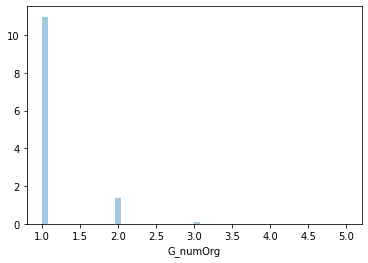

In [167]:



train_set.G_numOrg = np.where( (train_set.G_numOrg >= 5), 5 , train_set.G_numOrg)
train_set.G_numOrg = np.where( (train_set.G_numOrg < 1), 1 , train_set.G_numOrg)


sns.distplot(train_set.G_numOrg)



<AxesSubplot:xlabel='G_numOrg'>

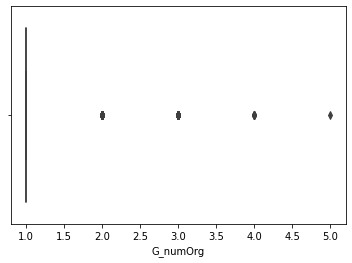

In [168]:
sns.boxplot(train_set.G_numOrg)

## G_numQuery: limit 1-5

In [169]:
train_set.G_numQuery.value_counts()
make_float(train_set, ['G_numQuery'])


In [170]:
train_set.G_numQuery.value_counts()


1.0     20239
2.0      2627
3.0       563
4.0       144
5.0        55
6.0        18
7.0         7
14.0        3
13.0        1
8.0         1
Name: G_numQuery, dtype: int64

<AxesSubplot:xlabel='G_numQuery'>

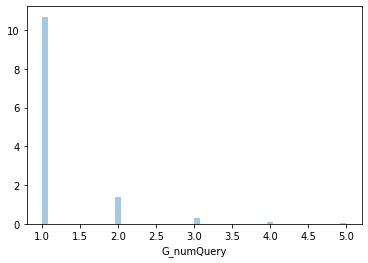

In [171]:
train_set.G_numQuery = np.where( (train_set.G_numQuery >= 5), 5 , train_set.G_numQuery)
train_set.G_numQuery = np.where( (train_set.G_numQuery < 1), 1 , train_set.G_numQuery)


sns.distplot(train_set.G_numQuery)

<AxesSubplot:xlabel='G_numQuery'>

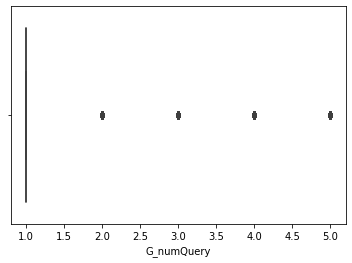

In [172]:
sns.boxplot(train_set.G_numQuery)

## A_numOrg : limit 1-10


In [173]:
make_float(train_set, ['A_numOrg'])
train_set.A_numOrg.value_counts()


2.0     8978
3.0     8392
1.0     7913
4.0     6323
5.0     4101
6.0     2654
7.0     1432
8.0      793
9.0      417
10.0     173
11.0      74
12.0      30
13.0      14
15.0       3
Name: A_numOrg, dtype: int64

<AxesSubplot:xlabel='A_numOrg'>

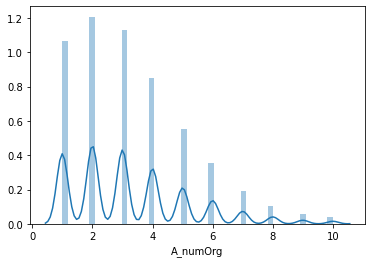

In [174]:



train_set.A_numOrg = np.where( (train_set.A_numOrg >= 10), 10 , train_set.A_numOrg)
train_set.A_numOrg = np.where( (train_set.A_numOrg < 1), 1 , train_set.A_numOrg)


sns.distplot(train_set.A_numOrg)


<AxesSubplot:xlabel='A_numOrg'>

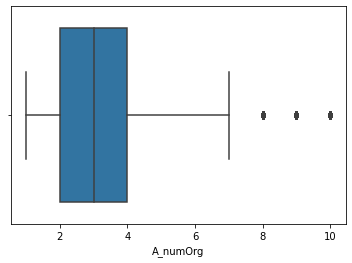

In [175]:
sns.boxplot(train_set.A_numOrg)

## A_numQuery: limit 1-15

In [176]:
make_float(train_set, ['A_numQuery'])
train_set.A_numQuery.value_counts()



2.0     7601
3.0     7136
1.0     7108
4.0     5450
5.0     4092
6.0     2992
7.0     2089
8.0     1436
9.0     1044
10.0     714
11.0     494
12.0     329
13.0     234
14.0     169
15.0     134
16.0      85
18.0      46
17.0      44
19.0      26
20.0      18
21.0      16
23.0      11
26.0       8
25.0       7
22.0       6
24.0       6
27.0       5
33.0       4
28.0       3
35.0       2
34.0       2
40.0       1
30.0       1
63.0       1
38.0       1
42.0       1
Name: A_numQuery, dtype: int64

<AxesSubplot:xlabel='A_numQuery'>

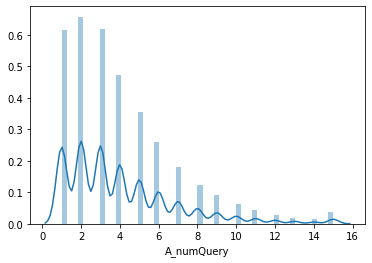

In [177]:


train_set.A_numQuery = np.where( (train_set.A_numQuery >= 15), 15 , train_set.A_numQuery)
train_set.A_numQuery = np.where( (train_set.A_numQuery < 1), 1 , train_set.A_numQuery)


sns.distplot(train_set.A_numQuery)

<AxesSubplot:xlabel='A_numQuery'>

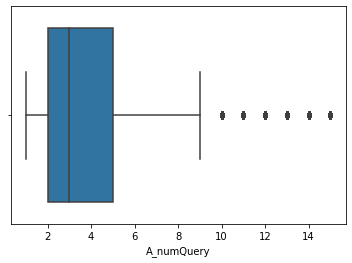

In [178]:

sns.boxplot(train_set.A_numQuery)

## summary_6m: limit 1-50

In [180]:
make_float(train_set, ['summary_6m'])
train_set.summary_6m.value_counts()


1.0      4290
2.0      4082
7.0      3344
8.0      3125
6.0      3059
         ... 
107.0       1
62.0        1
298.0       1
329.0       1
71.0        1
Name: summary_6m, Length: 103, dtype: int64

<AxesSubplot:xlabel='summary_6m'>

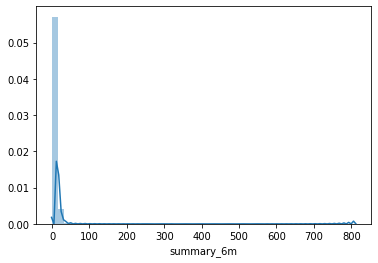

In [181]:
sns.distplot(train_set.summary_6m)

<AxesSubplot:xlabel='summary_6m'>

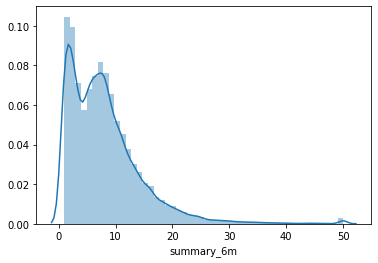

In [182]:

train_set.summary_6m = np.where( (train_set.summary_6m >= 50), 50 , train_set.summary_6m)
train_set.summary_6m = np.where( (train_set.summary_6m < 1), 1 , train_set.summary_6m)


sns.distplot(train_set.summary_6m)


<AxesSubplot:xlabel='summary_6m'>

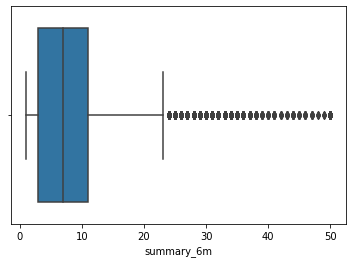

In [183]:
sns.boxplot(train_set.summary_6m)

## summary_3m: limit 1-50

In [184]:

make_float(train_set, ['summary_3m'])
train_set.summary_3m.value_counts()



1.0      4766
2.0      4126
7.0      3402
6.0      3341
5.0      3124
         ... 
172.0       1
60.0        1
320.0       1
91.0        1
799.0       1
Name: summary_3m, Length: 94, dtype: int64

<AxesSubplot:xlabel='summary_3m'>

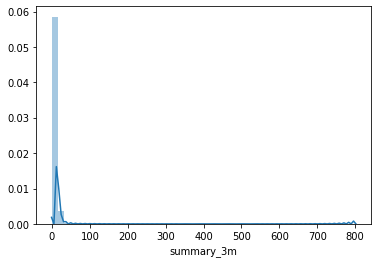

In [185]:

sns.distplot(train_set.summary_3m)

<AxesSubplot:xlabel='summary_3m'>

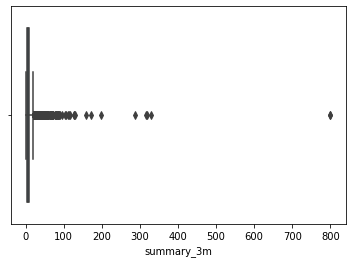

In [186]:
sns.boxplot(train_set.summary_3m)

<AxesSubplot:xlabel='summary_3m'>

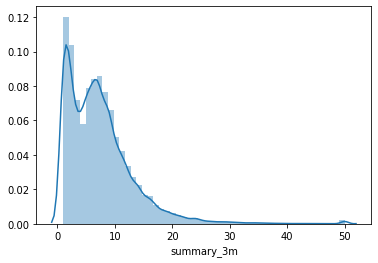

In [187]:


train_set.summary_3m = np.where( (train_set.summary_3m >= 50), 50 , train_set.summary_3m)
train_set.summary_3m = np.where( (train_set.summary_3m < 1), 1 , train_set.summary_3m)


sns.distplot(train_set.summary_3m)

<AxesSubplot:xlabel='summary_3m'>

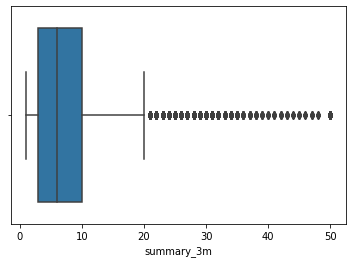

In [188]:
sns.boxplot(train_set.summary_3m)


## summary_1m

In [189]:
make_float(train_set, ['summary_1m'])
train_set.summary_1m.value_counts()

1.0      6386
2.0      4652
5.0      3881
6.0      3506
7.0      3030
         ... 
320.0       1
66.0        1
109.0       1
790.0       1
78.0        1
Name: summary_1m, Length: 80, dtype: int64

<AxesSubplot:xlabel='summary_1m'>

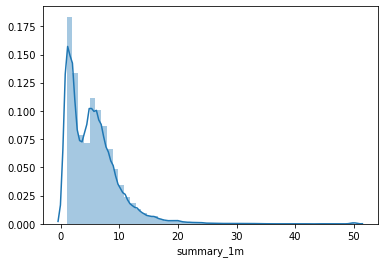

In [190]:


train_set.summary_1m = np.where( (train_set.summary_1m >= 50), 50 , train_set.summary_1m)
train_set.summary_1m = np.where( (train_set.summary_1m < 1), 1 , train_set.summary_1m)


sns.distplot(train_set.summary_1m)

<AxesSubplot:xlabel='summary_1m'>

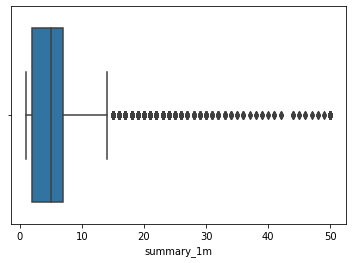

In [191]:
sns.boxplot(train_set.summary_1m)


## summary_1w: LIMIT 1-20

In [192]:
make_float(train_set, ['summary_1w'])
train_set.summary_1w.value_counts()




1.0      7520
2.0      3717
5.0      2835
6.0      1864
3.0      1808
4.0      1595
7.0      1191
8.0       750
9.0       475
10.0      272
11.0      196
12.0      133
13.0      114
14.0       73
15.0       51
16.0       40
17.0       22
18.0       16
20.0       16
19.0       13
21.0       12
22.0        9
25.0        6
23.0        6
31.0        6
26.0        6
24.0        6
30.0        5
28.0        5
29.0        3
37.0        3
35.0        3
33.0        2
50.0        2
46.0        1
95.0        1
42.0        1
40.0        1
48.0        1
32.0        1
64.0        1
43.0        1
320.0       1
39.0        1
63.0        1
53.0        1
781.0       1
47.0        1
41.0        1
96.0        1
27.0        1
Name: summary_1w, dtype: int64

<AxesSubplot:xlabel='summary_1w'>

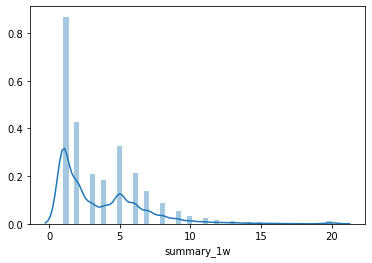

In [193]:


train_set.summary_1w = np.where( (train_set.summary_1w >= 20), 20 , train_set.summary_1w)
train_set.summary_1w = np.where( (train_set.summary_1w < 1), 1 , train_set.summary_1w)


sns.distplot(train_set.summary_1w)

<AxesSubplot:xlabel='summary_1w'>

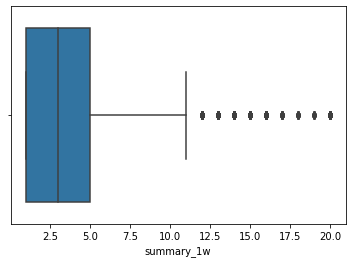

In [194]:
sns.boxplot(train_set.summary_1w)


## brief

In [195]:
train_set.brief.value_counts().sort_index()


0           13750
1           11668
1cy          1739
2            8096
2cy          2268
3            4544
3cy          1322
4            1896
4cy           602
5             553
5cy           188
6              90
6cy            53
7              14
7cy            19
8               5
cb1           836
cb2           117
cb3             5
nan           252
notfound     5013
Name: brief, dtype: int64

<AxesSubplot:>

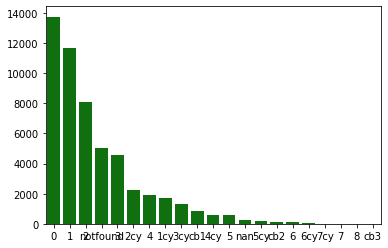

In [196]:

sns.barplot(train_set.brief.value_counts().index,
           train_set.brief.value_counts().values, color='g')

## num_of_phone: limit 0-5

In [197]:
make_float(train_set, ['num_of_phone'])
train_set.num_of_phone.value_counts()

1.0    46263
2.0     4024
3.0      172
0.0       31
4.0       17
5.0        3
Name: num_of_phone, dtype: int64

<AxesSubplot:xlabel='num_of_phone'>

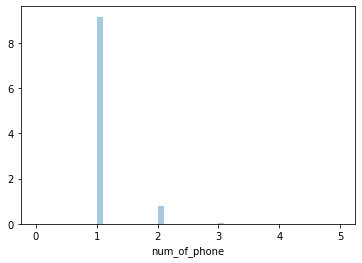

In [198]:

train_set.num_of_phone = np.where( (train_set.num_of_phone >= 5), 5 , train_set.num_of_phone)
train_set.num_of_phone = np.where( (train_set.num_of_phone < 0), 0 , train_set.num_of_phone)


sns.distplot(train_set.num_of_phone)


<AxesSubplot:xlabel='num_of_phone'>

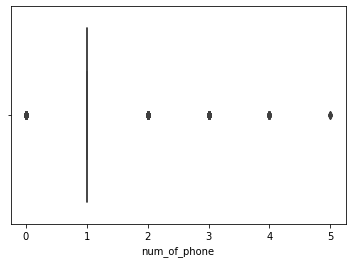

In [199]:

sns.boxplot(train_set.num_of_phone)


Series([], Name: label, dtype: int64)

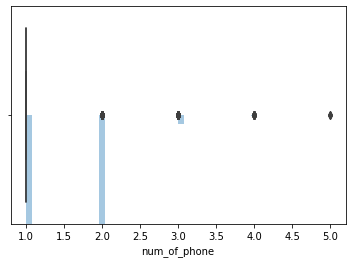

In [200]:
make_float(train_set, ['num_of_phone'])
train_set.num_of_phone.value_counts()



train_set.num_of_phone = np.where( (train_set.num_of_phone >= 20), 20 , train_set.num_of_phone)
train_set.num_of_phone = np.where( (train_set.num_of_phone < 1), 1 , train_set.num_of_phone)


sns.distplot(train_set.num_of_phone)

sns.boxplot(train_set.num_of_phone)

train_set[train_set.num_of_phone>100].label.value_counts()

In [477]:
train_cols_corr = train_set.corr()
for col in train_cols_corr.columns:
    res = train_cols_corr[col][train_cols_corr[col]>0.9]
    if len(res)>1:
        print ("For", col)
        print (res)

For numOrg
numOrg      1.000000
A_numOrg    0.942604
Name: numOrg, dtype: float64
For A_numOrg
numOrg      0.942604
A_numOrg    1.000000
Name: A_numOrg, dtype: float64
For summary_6m
summary_6m    1.000000
summary_3m    0.947688
Name: summary_6m, dtype: float64
For summary_3m
summary_6m    0.947688
summary_3m    1.000000
Name: summary_3m, dtype: float64
For partner0_A
partner0_A    1.000000
partner0_C    0.913411
partner0_D    0.945770
partner0_E    0.942555
partner0_F    0.943628
Name: partner0_A, dtype: float64
For partner0_C
partner0_A    0.913411
partner0_C    1.000000
partner0_D    0.907392
partner0_E    0.904729
Name: partner0_C, dtype: float64
For partner0_D
partner0_A    0.945770
partner0_C    0.907392
partner0_D    1.000000
partner0_E    0.997379
partner0_F    0.993257
Name: partner0_D, dtype: float64
For partner0_E
partner0_A    0.942555
partner0_C    0.904729
partner0_D    0.997379
partner0_E    1.000000
partner0_F    0.995465
Name: partner0_E, dtype: float64
For partner0_F


In [202]:
cols_to_drop.extend(['partner0_C', 'partner0_D', 'partner0_E', \
                     'partner0_F', 'A_numOrg', 'summary_3m',\
                     'partner2_C', 'partner2_D', 'partner2_F',\
                     'partner2_H'])  
                     

# DROP ALL THE COLS WE DECIDE TO DROP ALONG THE WAY

In [478]:
train_set_reduced = train_set.drop(cols_to_drop, axis=1)

In [479]:
len(train_set_reduced.columns)

82

In [480]:
train_set_reduced.to_csv('train_set_reduced.csv')

In [481]:
train_cols_corr = train_set_reduced.corr()
for col in train_cols_corr.columns:
    res = train_cols_corr[col][train_cols_corr[col]>0.9]
    if len(res)>1:
        print ("For", col)
        print (res)

## Fix info_social_sex col

In [489]:
train_set_reduced.info_social_sex = np.where((train_set_reduced.info_social_sex.str.lower() == 'male') \
                                                 | (train_set_reduced.info_social_sex.str.lower() == 'female'),\
                                            train_set_reduced.info_social_sex, np.nan)

In [490]:
total_cols = train_set_reduced.columns
cat_cols= []
num_cols = []

for col in total_cols:
    length = len(train_set_reduced[col].value_counts().index)
    
    # if have less than 20 values then most likely its categorical
    if (length <= 20):
        cat_cols.append(col)
    else:
        num_cols.append(col)



In [491]:
num_cols.remove('Field_36')
cat_cols.append('Field_36')
num_cols.remove('brief')
cat_cols.append('brief')

ValueError: list.remove(x): x not in list

In [503]:
from scipy import stats

?stats.skew

In [540]:
def is_cat(df, col, cutoff_cat = 50):
    """
    cutoff_cat: value to determine if a column looks like categorical
        instead of numeric one
    """
    if (len(df[col].value_counts().index) < cutoff_cat):
        return True
    else:
        return False

def fill_numeric_var(df, cols, col_median= None, col_std = None, std= True, round_up= True, seed= 76, cuttoff_skewness= 0.2):
    
    from numpy import random
    from scipy import stats
    
    random.seed(seed)

    if ((col_median == None) & (col_std == None)):

        # if skewness > cuttoff_skewness 
        skewness = stats.skew(df[col].values, nan_policy= 'omit')

        if (skewness > cuttoff_skewness):
            mean_or_median = 'median'
        else:
            mean_or_median = 'mean'


        if (mean_or_median == 'median'):
            col_median = df[col].median()
        else:
            col_median = df[col].mean()


        if (std == True):
            col_std = df[col].std()
        else:
            col_std = 0
            
        print ("skewess =", skewness, ". Fill NAs with", mean_or_median)

    col_random= col_median + col_std*random.randn(len(df))
    # if want to round up to interger
    if (round_up == True):
     
        col_random= np.round(col_random)

    
    # start fill in nulls
    col_random = np.where(col_random <0, 0, col_random)
    df[col] = np.where(df[col].isnull(), col_random, df[col])
    
    return col_median, col_std


def fill_cat_var(df, col_name, probabilities = None, seed= 76):
    random.seed(seed)

    for name in col_name:
        info = df[name].value_counts()/df[name].value_counts().sum()
#         if (np.array(probabilities == None).any()):
        probabilities = info.values

        values= info.index
#         if (len(values) > len(probabilities)):
        # if there are more values in test set later:
#             print (len(info.index), len(p))
        random_val= random.choice(values, size= len(df), p = probabilities)
        df[name] = np.where(df[name].isnull(), random_val, df[name])
            
    return probabilities

# Rematch string nan to np.nan

In [526]:
train_set_reduced = train_set_reduced.applymap(lambda x: np.nan if x == 'nan' else x)

In [527]:
make_float(train_set_reduced, ['Field_19'])


In [528]:
for col in num_cols:
    print (col)
    fill_numeric_var(train_set_reduced, col)

Field_19
skewess = 3.155774245021669 . Fill NAs with median
Field_20
skewess = 2.1994977585252053 . Fill NAs with median
Field_23
skewess = 3.9879208988222845 . Fill NAs with median
Field_28
skewess = 7.658054095642662 . Fill NAs with median
Field_29
skewess = 1.9030764173955512 . Fill NAs with median
Field_60
skewess = 3.029030658449159 . Fill NAs with median
Field_67
skewess = 1.0324845732226602 . Fill NAs with median
Field_69
skewess = 1.5712867436424662 . Fill NAs with median
Field_70
skewess = 1.3514918914455423 . Fill NAs with median
Field_71
skewess = 1.52988650883725 . Fill NAs with median
Field_72
skewess = 1.3167571283959953 . Fill NAs with median
Field_74
skewess = 1.5659236385227195 . Fill NAs with median
friendCount
skewess = 4.5466160724408855 . Fill NAs with median
subscriberCount
skewess = 85.66867253673628 . Fill NAs with median
summary_6m
skewess = 1.987278013395249 . Fill NAs with median
summary_1m
skewess = 2.6918340110050987 . Fill NAs with median
Field_78
skewess 

In [541]:
fill_cat_var(train_set_reduced, cat_cols)

array([5.95391127e-01, 1.89920050e-01, 5.33782725e-02, 5.20065841e-02,
       3.18231698e-02, 1.25411507e-02, 1.04640226e-02, 9.83696504e-03,
       8.15174792e-03, 8.11255683e-03, 4.93807807e-03, 4.50697602e-03,
       3.25286095e-03, 2.82175890e-03, 2.82175890e-03, 2.23389246e-03,
       1.64602602e-03, 1.09735068e-03, 1.05815959e-03, 7.83821916e-04,
       6.27057533e-04, 4.70293149e-04, 3.13528766e-04, 3.13528766e-04,
       2.74337670e-04, 2.35146575e-04, 2.35146575e-04, 1.95955479e-04,
       1.95955479e-04, 1.56764383e-04, 7.83821916e-05, 3.91910958e-05,
       3.91910958e-05, 3.91910958e-05])

In [542]:
train_set_reduced

,label,Field_3,Field_4,Field_10,Field_12,Field_13,Field_19,Field_20,Field_21,Field_22,...,Field_79,Field_80,Field_81,Field_82,E_diff_date,F_diff_date,G_diff_date,A_diff_date,age,partner_sum
id,,,,,,,,,,,,,,,,,,,,,
0,1,1.0,GH,1.0,G8,1.0,0.0,4258600.0,4.5,1.0,...,0.000000,0.000000,0.0,1.0,-0.0,0.0,0.0,67.0,29.0,0.0
1,0,2.0,T1,1.0,G7,1.0,-0.0,0.0,4.5,1.0,...,1.000000,-0.000000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0,2.0,T1,1.0,G8,1.0,0.0,5000000.0,4.5,1.0,...,10.769445,6.466667,0.0,2.0,24.0,0.0,-0.0,47.0,22.0,5.0
3,0,2.0,T1,1.0,G8,1.0,-0.0,0.0,4.5,1.0,...,10.769445,6.466667,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,2.0,GH,1.0,G8,1.0,0.0,0.0,4.5,1.0,...,10.769445,6.466667,0.0,3.0,1.0,-0.0,1.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53025,0,1.0,GH,1.0,G8,1.0,1.0,1490000.0,4.5,1.0,...,157.837469,14.000000,-183.0,1.0,0.0,0.0,1.0,202.0,32.0,8.0
53026,0,1.0,T1,1.0,G8,1.0,-0.0,0.0,4.5,1.0,...,10.246951,12.500000,2.0,1.0,0.0,0.0,0.0,52.0,1.0,2.0
53027,0,2.0,T1,1.0,G8,1.0,0.0,4015000.0,4.5,1.0,...,0.000000,1.000000,0.0,1.0,1.0,-0.0,1.0,0.0,32.0,0.0


In [535]:
np.array(probabilities == None).any()

False

In [ ]:
train_set_reduced.Field_65.value_counts().index

In [ ]:
sns.distplot(train_set[train_set.Field_36=='HC'].age)

In [ ]:
train_set[train_set.Field_36=='CH'].label.value_counts()/train_set[train_set.Field_36=='CH'].label.value_counts().sum()

In [ ]:
sns.distplot(train_set[train_set.Field_36=='DN'].age)

In [ ]:
sns.distplot(train_set.Field_29.value_counts())

In [ ]:
train_set.Field_39.value_counts().iloc[:20]

In [ ]:
# # store all duplicated columns
# duplicated_cols_dict= {}
# duplicated_cols_list_full = []


# # THIS FUNCTION is to drop all duplicates columns
# for i, col in enumerate(train_set_original.columns):
#     duplicated_cols_list= []
#     # if the col is already one of the keys
#     # then skip
#     if col in duplicated_cols_list_full:
#         continue
#     for c in train_set_original.columns:
#         if (train_set_original[col].equals(train_set_original[c])):
#             duplicated_cols_list.append(c)
#             duplicated_cols_list_full.append(c)
        
           
#     if (len(duplicated_cols_list) > 1):
#         duplicated_cols_dict[col] = duplicated_cols_list   

# from matplotlib.cbook import flatten

# # determine duplicated columns to drop
# drop_cols = set(list(flatten(list(duplicated_cols_dict.values())))) - set(duplicated_cols_dict.keys())

In [ ]:
# drop the duplicates

# train_set= train_set_original.drop(drop_cols, axis= 1).copy()
# test_set= test_set_original.drop(drop_cols, axis= 1).copy()

In [ ]:
cols_Vincent = train_set.columns[:int(len(train_set.columns)/2)]
cols_Duong = train_set.columns[int(len(train_set.columns)/2):]


In [ ]:
# na_counts= train_set.isna().sum().sort_values()
# fig, ax = plt.subplots(figsize= (20,15))
# total_samples= len(train_set)

# ax.bar(na_counts.index,na_counts.values/total_samples)
# ax.set_xlabel("column ", fontsize= 30)
# ax.set_ylabel("counts", fontsize= 30)
# ax.set_xticklabels([])
# ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [ ]:
# train_set.describe()

In [ ]:
# print ("Labels count")
# train_set.label.value_counts()

In [ ]:
# corrs = train_set.corr()['label'].sort_values()
# # exclude nan corrs
# corrs = corrs[corrs.values < 1]

# fig, ax = plt.subplots(figsize= (20,15))
# total_samples= len(train_set)

# ax.bar(corrs.index,corrs.values)
# ax.set_xlabel("column ", fontsize= 30)
# ax.set_ylabel("correlation", fontsize= 30)
# ax.set_xticklabels([])
# ax.set_title("Correlation with labels", fontsize= 35)

In [ ]:
from datetime import datetime

train_set['E_endDate'] = train_set['E_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['E_startDate'] = train_set['E_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


train_set['C_endDate'] = train_set['C_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['C_startDate'] = train_set['C_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


train_set['F_endDate'] = train_set['F_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['F_startDate'] = train_set['F_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['G_startDate'] = train_set['G_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['G_endDate'] = train_set['G_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


train_set['A_endDate'] = train_set['A_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

train_set['A_startDate'] = train_set['A_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))  

train_set['E_diff_date']= (train_set['E_endDate'] - train_set['E_startDate']).dt.days

train_set['F_diff_date']= (train_set['F_endDate'] - train_set['F_startDate']).dt.days

train_set['G_diff_date']= (train_set['G_endDate'] - train_set['G_startDate']).dt.days

train_set['A_diff_date']= (train_set['A_endDate'] - train_set['A_startDate']).dt.days

train_set.drop(['E_endDate', 'E_startDate', 'F_endDate', 'F_startDate',\
                       'G_endDate', 'G_startDate', 'A_endDate', 'A_startDate',\
                       'C_endDate', 'C_startDate'],\
                    axis= 1, inplace= True)

useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

train_set.drop(useless_cols, axis= 1, inplace= True)

In [ ]:
train_set.to_csv('./Data/train_set_drop_duplicates_fix_startenddate.csv')

In [ ]:
len(train_set.columns)

## Duong's part

In [ ]:
# Fix maCv column
# remove accent, make all lower case

train_set.maCv = train_set.maCv.apply(lambda x: unidecode.unidecode(x).lower() \
                     if type(x) == str else np.nan)

In [ ]:
sns.distplot(train_set.Field_20.values)

In [ ]:
train_set[train_set.Field_20 == 0].maCv

In [ ]:
train_set.Field_20

In [ ]:
# # tai xe and lai xe is 1
# # ky thuat, ky su
# # thu kho, cong nhan,tho phu, cn
# # can bo, to truong 
# # nhan vien, nv, ke toan vien

# main_cv = ['cong nhan', 'nhan vien', 'giao vien', 'ky su', 'can bo', 'ky thuat',\
#           'dieu duong', 'giam sat', 'ke toan', 'quan ly', 'lao dong', 'huan luyen vien',\
#           'bao mau']

# for ix, cv in enumerate(train_set.maCv.values):
#     for mcv in main_cv:
#         if type (cv) == str:
#             if ('cn' in cv):
#                 train_set.maCv.iloc[ix] = 'cong nhan'
#             elif ('nv' in cv):
#                 train_set.maCv.iloc[ix] = 'nhan vien'
#             elif ((cv == 'lai xe')| (cv == 'lai xe taxi') | (cv == 'lai xe con')):
#                 train_set.maCv.iloc[ix] = 'tai xe'
#             elif(cv == 'ki thuat vien'):
#                 train_set.maCv.iloc[ix] = 'ky thuat'
#             elif ((cv == 'duoc sy trung hoc')|(cv == 'duoc si trung hoc')|(cv == 'duoc sy')):
#                 train_set.maCv.iloc[ix] = 'duoc sy'
#             elif (cv == 'undefined'):
#                 train_set.maCv.iloc[ix] = np.nan
#             elif (mcv in cv):
#                 train_set.maCv.iloc[ix] = mcv

# blue_collar_jobs = ['cong nhan', 'nhan vien', 'bao ve',  'lai xe',\
#                    'tai xe', 'tho may', 'thu kho', 'cn may',\
#                    'nv ban hang', 'nv', 'cn', 'may cong nghiep']
# white_collar_jobs = ['giao vien', 'ky thuat vien', 'ke toan', 'chuyen vien', \
#                     'ky su', 'dieu duong', 'ky thuat', 'dieu duong trung cap',\
#                     'nv ban hang', 'nv', 'dai dien kinh doanh', 'to truong',\
#                     'ke toan vien', ]
# minimal_jobs = ['lao dong pho thong', 'ban hang', 'tho phu', 'tap vu', \
#                'phu viec', 'nv bao ve' ]
# executive_jobs = ['giam doc', ]
# govt_jobs = ['can bo', 'can bo ky thuat', 'can bo cap 2']

In [ ]:
partner_field_list = ['partner0_A', 'partner0_B', 'partner0_C', 'partner0_D',
       'partner0_E', 'partner0_F', 'partner0_G', 'partner0_H', 'partner1_A',
       'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A', 'partner2_C',
       'partner2_D', 'partner2_F', 'partner2_H', 'partner3_A', 'partner3_D',
       'partner3_E', 'partner4_L', 'partner5_A', 'partner5_D', 'partner5_G']

for col in partner_field_list:

    print ("percentage of nan in", col, "=", \
           train_set[col].value_counts(dropna= False)[np.nan]/train_set[col].value_counts(dropna= False).sum())

In [ ]:
train_set.head()

### This can be added later after imputing all the partner columns


In [ ]:
# train_set['count_partner']= train_set[partner_field_list].sum(axis=1, skipna= False)

In [ ]:
# ### DUMB MOVE
# def encode_partner_fields(df, partner_field_cols):
#     partner_field_list = ['partner0_A', 'partner0_B', 'partner0_C', 'partner0_D',
#        'partner0_E', 'partner0_F', 'partner0_G', 'partner0_H', 'partner1_A',
#        'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A', 'partner2_C',
#        'partner2_D', 'partner2_F', 'partner2_H', 'partner3_A', 'partner3_D',
#        'partner3_E', 'partner4_L', 'partner5_A', 'partner5_D', 'partner5_G']
    
#     # Fill partner0_H
#     # Logic: partner0_A, partner0_C, partner0_D, partner0_E, 
#     #          partner0_F, partner1_C, partner2_F =0 then partner0_H= 0
#     # If the average of the values of columns is 0 then fill with 0
#     # else fill with 
#     cols_for_partner0_H = ['partner0_A', 'partner0_C', 'partner0_D', 'partner0_E',\
#                            'partner0_F', 'partner1_C', 'partner2_F']
#     df['partner0_H'] = round(train_set[cols_for_partner0_H].mean(axis = 1))
        
        
#     # Fill partner5_G
#     cols_for_partner5_G = ['partner2_D', 'partner3_E', 'partner2_C', 'partner2_A',\
#                            'partner2_F', 'partner2_H', 'partner5_D', 'partner1_C', 'partner1_H']
#     df['partner5_G'] = round(train_set[cols_for_partner5_G].mean(axis = 1))
#     df['partner5_G'] = np.where(df['partner5_A'] == 0, 0, df['partner5_G'])
    
    
#     # Fill partner5_D
#     cols_for_partner5_D = ['partner2_D', 'partner3_E', 'partner1_G',\
#                            'partner1_C', 'partner1_H']
    
#     df['partner5_D'] = round(train_set[cols_for_partner5_D].mean(axis = 1))
#     df['partner5_D'] = np.where(df['partner5_A'] == 0, 0, df['partner5_D'])
    
#     # Fill partner2_F
#     df['partner2_F'] = np.where(df['partner2_C'] == 1, 1, df['partner2_F'])
#     df['partner2_F'] = np.where(df['partner2_A'] == 0, 0, df['partner2_F'])
    
#     # Fill partner2_H
#     cols_for_partner2_H = ['partner2_A', 'partner2_C']
#     df['partner2_H'] = round(train_set[cols_for_partner2_H].mean(axis = 1))
        
#     # Fill partner2_C
#     df['partner2_C'] = np.where(df['partner2_A'] == 0, 0, df['partner2_C'])
    
#     # Fill partner3_E
#     cols_for_partner3_E = ['partner1_C', 'partner1_H' ]
#     df['partner3_E'] = round(train_set[cols_for_partner3_E].mean(axis = 1))
    
#     # Fill partner2_D
#     df['partner2_D'] = np.where(df['partner2_A'] == 0, 0, df['partner2_D'])
    

In [ ]:
train_set.Field_61.value_counts()

In [ ]:
encode_partner_fields(train_set, partner_field_list)

In [ ]:
train_set[(~train_set.brief.isnull()) & (train_set.partner0_A.isnull())]

In [ ]:
train_set[(~train_set.brief.isnull()) & (~train_set.partner0_A.isnull())]

In [ ]:
train_set_original[train_set.Field_62 == 'V'].Field_61.value_counts()

In [ ]:
train_set[train_set.Field_62 == 'I'].Field_61.value_counts()

In [ ]:
train_set[(train_set.Field_3 == 1) & (train_set.Field_4=='T1')]

In [ ]:
train_set.Field_13.value_counts(dropna = False)

In [ ]:
train_set.Field_13.fillna(-1)

In [ ]:
pd.crosstab(train_set.Field_13.fillna(-1), train_set.Field_10.fillna(-1))

# train_set.Field_19.value_counts(dropna= False)

In [ ]:
sns.distplot(train_set.Field_20)

In [ ]:
train_set[['Field_27', 'Field_28']].corr()

In [ ]:
sns.distplot(train_set.Field_27*4)

In [ ]:
sns.distplot(train_set.Field_28)

In [ ]:
sns.distplot(train_set.Field_29)

In [ ]:
train_set[(train_set.Field_29).isnull()].label.value_counts()

In [ ]:
train_set[train_set.Field_29>12].label.value_counts(dropna=False)

In [ ]:
train_set[train_set.Field_29<12].label.value_counts(dropna=False)

In [ ]:
train_set[train_set.Field_19 <= 1].label.value_counts()

In [ ]:
train_set[train_set.Field_19 > 1].label.value_counts()

In [ ]:
pd.crosstab(data_Duong_train.A_diff_date, data_Duong_train.label)

In [ ]:
train_set.maCv.value_counts()[:50]

In [ ]:
train_set[train_set.partner0_A.isnull()][:20]

In [ ]:
train_set[(~train_set.brief.isnull()) & (train_set.partner0_A.isnull())].brief.value_counts()

In [ ]:
for col in partner_field_list:

    print ("percentage of nan in", col, "=", \
           train_set[col].value_counts(dropna= False)[np.nan]/train_set[col].value_counts(dropna= False).sum())

In [ ]:
pd.crosstab(train_set.label, train_set['partner0_A']).div(train_set[['partner0_A', 'label']].dropna().partner0_A.value_counts(), axis= 0)

In [ ]:
0.661150*.7/(0.46280499999999997+.1115)

In [ ]:
0.371651*.3/(0.46280499999999997+.1115)

In [ ]:
train_set.columns

In [ ]:
train_set.partner0_A.value_counts()/train_set.partner0_A.value_counts().sum()

In [ ]:
train_set.label.train_set.partner0_B.value_counts()/train_set.partner0_B.value_counts().sum()value_counts()/train_set.label.value_counts().sum()

In [ ]:
pd.crosstab(train_set.label, train_set['partner0_A'])

In [ ]:
for col in partner_field_list:
    print (pd.crosstab(train_set.label, train_set[col]), '\n')

In [ ]:
cols_for_partner0_H = ['partner0_A', 'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F', 'partner1_C', 'partner2_F']

round(train_set[cols_for_partner0_H].mean(axis = 1))[:100]

In [ ]:
train_set[cols_for_partner0_H].mean(axis = 1)

In [ ]:
cols_for_partner0_H = ['partner0_A', 'partner0_C', 'partner0_D', 'partner0_E', 'partner0_F', 'partner1_C', 'partner2_F']
train_set[cols_for_partner0_H].isnull().sum(axis=1).value_counts()

In [ ]:
cols_Duong

In [ ]:
train_set[train_set.partner0_B.isnull()].label.value_counts()/train_set[train_set.partner0_B.isnull()].label.value_counts().sum()

In [ ]:
train_set[~train_set.partner0_B.isnull()].label.value_counts()/train_set[~train_set.partner0_B.isnull()].label.value_counts().sum()

In [ ]:
# check to see if 

In [ ]:
import unidecode


In [ ]:
unicodedata.normalize('NFKD', 'Nhân viên bán hàng trực tiếp')

In [ ]:
train_set.maCv.value_counts()

In [ ]:
import unidecode
accented_string = np.nan
unidecode.unidecode(accented_string)

In [ ]:
type(train_set.maCv.iloc[1]) != str

In [ ]:
'cong ' in 'cong nhan san xuat'

In [ ]:
train_set.maCv.apply(lambda x: unidecode.unidecode(x).lower() if type(x) == str else np.nan) .value_counts()

In [ ]:
data_Duong_train = train_set[cols_Duong].copy()
data_Duong_train['label'] = train_set.label

from datetime import datetime

data_Duong_train['E_endDate'] = data_Duong_train['E_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['E_startDate'] = data_Duong_train['E_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong_train['C_endDate'] = data_Duong_train['C_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['C_startDate'] = data_Duong_train['C_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong_train['F_endDate'] = data_Duong_train['F_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['F_startDate'] = data_Duong_train['F_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['G_startDate'] = data_Duong_train['G_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['G_endDate'] = data_Duong_train['G_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong_train['A_endDate'] = data_Duong_train['A_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong_train['A_startDate'] = data_Duong_train['A_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))  

data_Duong_train['E_diff_date']= (data_Duong_train['E_endDate'] - data_Duong_train['E_startDate']).dt.days

data_Duong_train['F_diff_date']= (data_Duong_train['F_endDate'] - data_Duong_train['F_startDate']).dt.days

data_Duong_train['G_diff_date']= (data_Duong_train['G_endDate'] - data_Duong_train['G_startDate']).dt.days

data_Duong_train['A_diff_date']= (data_Duong_train['A_endDate'] - data_Duong_train['A_startDate']).dt.days

data_Duong_train.drop(['E_endDate', 'E_startDate', 'F_endDate', 'F_startDate',\
                       'G_endDate', 'G_startDate', 'A_endDate', 'A_startDate',\
                       'C_endDate', 'C_startDate'],\
                    axis= 1, inplace= True)

useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong_train.drop(useless_cols, axis= 1, inplace= True)

In [ ]:
# cols of numQuery
cols_query= ['A_numQuery', 'E_numQuery', 'C_numQuery', 'F_numQuery', 'G_numQuery']

# create a column storing sum of numQuery
data_Duong_train['sum_numQuery'] = data_Duong_train[cols_query].sum(axis=1)

In [ ]:
data_Duong_train.corr()['summary_6m'].sort_values()

In [ ]:
train_set[train_set.partner0_A.isnull()].label.value_counts()

In [ ]:
sns.scatterplot(data_Duong_train.Field_78, data_Duong_train.label)

In [ ]:
train_set[train_set.Field_80 == train_set.Field_81].partner5_D.value_counts()

In [ ]:
a = train_set[((train_set.Field_79.isnull()) | (train_set.Field_79==0)) &  (~train_set.Field_78.isnull())][['Field_78', 'Field_79', 'Field_80', 'Field_81']]

In [ ]:
train_set[(train_set.Field_80 <0) & ((train_set.Field_81 <0))].label.value_counts()

In [ ]:
(a.Field_78 == a.Field_81).value_counts()

In [ ]:
data_Duong_test = test_set[cols_Duong].copy()
from datetime import datetime

data_Duong_test['E_endDate'] = data_Duong_test['E_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))

data_Duong_test['E_startDate'] = data_Duong_test['E_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))


data_Duong_test['F_endDate'] = data_Duong_test['F_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))

data_Duong_test['F_startDate'] = data_Duong_test['F_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))

data_Duong_test['G_startDate'] = data_Duong_test['G_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))

data_Duong_test['G_endDate'] = data_Duong_test['G_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))               


data_Duong_test['A_endDate'] = data_Duong_test['A_endDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))

data_Duong_test['A_startDate'] = data_Duong_test['A_startDate'].apply(lambda row: \
              np.nan \
                    if row is np.nan \
                else datetime.strptime(row, '%m/%d/%Y'))  

data_Duong_test['E_diff_date']= (data_Duong_test['E_endDate'] - data_Duong_test['E_startDate']).dt.days

data_Duong_test['F_diff_date']= (data_Duong_test['F_endDate'] - data_Duong_test['F_startDate']).dt.days

data_Duong_test['G_diff_date']= (data_Duong_test['G_endDate'] - data_Duong_test['G_startDate']).dt.days

data_Duong_test['A_diff_date']= (data_Duong_test['A_endDate'] - data_Duong_test['A_startDate']).dt.days

data_Duong_test.drop(['E_endDate', 'E_startDate', 'F_endDate', 'F_startDate', 'G_endDate', 'G_startDate', 'A_endDate', 'A_startDate'],\
                    axis= 1, inplace= True)

useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong_test.drop(useless_cols, axis= 1, inplace= True)


In [ ]:
cat_cols = ['info_social_sex', 'topFriends', 'numOrg', 'F_numOrg', 'F_numQuery',\
           'E_numOrg', 'E_numQuery', 'C_numOrg', 'C_numQuery',\
           'partner0_A', 'partner0_B', 'partner0_C', 'partner0_D',
           'partner0_E', 'partner0_F', 'partner0_G', 'partner0_H', 'partner1_A',
           'partner1_C', 'partner1_G', 'partner1_H', 'partner2_A', 'partner2_C',
           'partner2_D', 'partner2_F', 'partner2_H', 'partner3_A', 'partner3_D',
           'partner3_E', 'partner4_L', 'partner5_A', 'partner5_D', 'partner5_G',
           'brief', 'num_of_phone', 'Field_82' ]
num_cols = ['subscriberCount', 'numOrg', \
            'summary_6m', 'summary_3m', 'summary_1m','summary_1w',
           'Field_78', 'Field_79', 'Field_80', 'Field_81',
           'E_diff_date', 'F_diff_date', 'G_diff_date', 'A_diff_date']

for col in data_Duong_train.columns:
    print (col)
    if is_cat(data_Duong_train, col):
        pr = fill_cat_var(data_Duong_train, [col])
        fill_cat_var(data_Duong_test, [col], pr)
    else:
        m, s = fill_numeric_var(data_Duong_train, col)
        fill_numeric_var(data_Duong_test, col, m, s )
        

In [ ]:
data_Duong.to_csv("/home/mangxu/MachineLearning/CreditScoreChallenge/Data/data_Vincent_dumbass_filled.csv")

In [ ]:
data_Duong.head()

In [ ]:
na_counts= data_Duong.isna().sum().sort_values()
fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(na_counts.index,na_counts.values/total_samples)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("counts", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Percentages of missing values in each column", fontsize= 35)

In [ ]:
corrs = data_Duong.corr()['label'].sort_values()
# exclude nan corrs
corrs = corrs[corrs.values < 1]

fig, ax = plt.subplots(figsize= (20,15))
total_samples= len(data_Duong)

ax.bar(corrs.index, corrs.values)
ax.set_xlabel("column ", fontsize= 30)
ax.set_ylabel("correlation", fontsize= 30)
ax.set_xticklabels([])
ax.set_title("Correlation with labels", fontsize= 35)

### Drop columns about geological info

In [ ]:
useless_cols = ['currentLocationLocationId', 'currentLocationLatitude', 
                'currentLocationLongitude', 'homeTownLocationId', 
                'homeTownLatitude', 'homeTownLongitude',
                'data.basic_info.locale', 'currentLocationCity',
                'currentLocationCountry', 'currentLocationName', 
                'currentLocationState', 'homeTownCity', 
                'homeTownCountry', 'homeTownName', 'homeTownState']

data_Duong.drop(useless_cols, axis= 1, inplace= True)

### For info_social_sex column:

In [ ]:
label_by_info_social_sex = data_Duong.groupby(['label'])\
                ['info_social_sex'].value_counts()
df = pd.DataFrame(label_by_info_social_sex).\
    rename({'info_social_sex':'counts'}, axis=1).reset_index()

### Female has a slightly higher chance of having label 0.
### For the existing values, there are more male than female customers.

In [ ]:
df['pct2'] = df['counts']/df['counts'].sum()

import seaborn as sns

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'info_social_sex', y = 'pct2', \
            hue= 'label', data= df, ax=ax)

ax.set_title("pct of Info social sex by label")

In [ ]:
print ("percentages of male and female in column info_social_sex:")
info_social_sex_pct_original = data_Duong.info_social_sex.value_counts()/data_Duong.info_social_sex.value_counts().sum()
info_social_sex_pct_original

In [ ]:
info_social_sex_pct_original

### We'll fill in missing values with 60% male and 40% female

In [ ]:
fill_cat_var(data_Duong, ['info_social_sex'])

In [ ]:
print ("After filling all NAs...")
data_Duong['info_social_sex'].value_counts()/data_Duong['info_social_sex'].value_counts().sum()

## subscriberCount column
### Plot its distributions

### A lot of missing values

In [ ]:
data_Duong.subscriberCount.value_counts(dropna= False)

## If subscriberCount > 60,000 then label = 0
## We can use it as a factor to automatically fill in label later


In [ ]:
sns.scatterplot(data_Duong.label, data_Duong.subscriberCount)

### it seems like the more subsciber counts, the more likely its label will be 0

In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15,8)

sns.boxplot(x= 'label', y= 'subscriberCount', data= data_Duong[data_Duong.subscriberCount <100000])
plt.suptitle("box plots of labels based on subscriberCount")

In [ ]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

## Fill in NAs of subscriberCount with median and std


In [ ]:
fill_null_with_median(data_Duong, 'subscriberCount')

In [ ]:
sns.distplot(data_Duong[data_Duong.subscriberCount < 60000].subscriberCount)

# COLUMN TOPFRIENDS

In [ ]:
label_by_topFriends = data_Duong.groupby('label')['topFriends'].\
        value_counts().sort_index()
df_label_by_topFriends= pd.DataFrame(label_by_topFriends).\
        rename({'topFriends':'counts'}, axis=1).reset_index()

## most samples has topFriends= 5

In [ ]:
fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'counts', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)


ax.set_title("Counts topFriends by label")

In [ ]:
df_label_by_topFriends['pct_by_group'] = df_label_by_topFriends.counts/\
        np.array(list(df_label_by_topFriends.groupby('topFriends').sum()['counts'].values)*2)

fig, ax = plt.subplots(figsize= (15,8))
sns.barplot(x= 'topFriends', y = 'pct_by_group', \
            hue= 'label', data= df_label_by_topFriends, ax=ax)

ax.set_title("percentage of labels by group of topFriends by label")

## Looks like most group will have the same proportions of label 0 and 1.

## fill in missing data randomly based on proportions of topFriends "categories" (0-5)

In [ ]:
fill_cat_var(data_Duong, ['topFriends'])

# COLUMN numOrg

In [ ]:
plt.hist(data_Duong.numOrg, bins= range(0, int(data_Duong.numOrg.max()), 1))

## Looks skewed. Fill with median

In [ ]:
fill_numeric_var(data_Duong, 'numOrg')

In [ ]:
data_Duong.F_numOrg.value_counts()

In [ ]:
data_Duong.columns

In [ ]:
fill_numeric_var(data_Duong, 'F_numOrg')

In [ ]:
len(data_Duong.F_numOrg.value_counts().index) > 500

### After filling nulls

In [ ]:
plt.hist(data_Duong.A_numOrg, bins= range(0, 16, 1))

In [ ]:
plt.hist(data_Duong.F_numQuery)

In [ ]:
data_Duong.columns

# create custom columns

### column diff_start_end_date = diff between E_startDate and E_endDate

In [ ]:
from datetime import datetime

data_Duong['E_endDate'] = data_Duong['E_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['E_startDate'] = data_Duong['E_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))


data_Duong['F_endDate'] = data_Duong['F_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['F_startDate'] = data_Duong['F_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_startDate'] = data_Duong['G_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['G_endDate'] = data_Duong['G_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))               


data_Duong['A_endDate'] = data_Duong['A_endDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))

data_Duong['A_startDate'] = data_Duong['A_startDate'].apply(lambda row: \
              datetime.strptime('1900-01-01', '%Y-%m-%d') \
                    if row is np.nan \
                else datetime.strptime(row, '%Y-%m-%d'))  

data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

## *letter*_diff_date = diff between *letter*_startDate and *letter*_endDate

In [ ]:
data_Duong[['E_endDate', 'F_endDate']]

In [ ]:
train_set.Field_1

In [ ]:
data_Duong['E_diff_date']= data_Duong['E_endDate'] - data_Duong['E_startDate']

data_Duong['F_diff_date']= data_Duong['F_endDate'] - data_Duong['F_startDate']

data_Duong['G_diff_date']= data_Duong['G_endDate'] - data_Duong['G_startDate']

data_Duong['A_diff_date']= data_Duong['A_endDate'] - data_Duong['A_startDate']

In [ ]:
E_diff_date_counts = data_Duong['E_diff_date'].value_counts()

In [ ]:
E_diff_date_counts

In [ ]:
plt.bar(E_diff_date_counts.index, E_diff_date_counts.values)

In [ ]:
for i, col in enumerate(data_Duong.columns):
    print (i+1, "/ Column name:", col)
    print(data_Duong[col].value_counts(dropna=False))

## Explore topfriends

In [ ]:
topFriends_counts

In [ ]:
train_set['E_endDate'].equals(train_set['G_endDate'])

In [ ]:
train_set[['Field_14','Field_16']].drop_duplicates()

In [ ]:
for i in range(10):
    if (i%3 == 0):
        continue
    print (i)